# FASE 1 - PREPROCESAMIENTO
# EXPERIMENTO 4

### Librerías

In [124]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

from sklearn.model_selection import train_test_split


### Funciones

In [125]:
def string2params(string, show=True):
    s1 = string.partition("g")
    t = s1[0][1:]
    s2 = s1[2].partition("v")
    g = s2[0]
    v = s2[-1]
    if show:
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10)
        print("v:", v)
    return float(t), float(g)/10, float(v)

### Listado de archivos

In [126]:
files = glob.glob('filtered_wv_models/*')
m = len(files)
print("Number of files in models", m)
print("5 first files: \n", files[0:5])


Number of files in models 5425
5 first files: 
 ['filtered_wv_models/f_t35000g20v280.dat', 'filtered_wv_models/f_t20000g20v260.dat', 'filtered_wv_models/f_t28000g20v350.dat', 'filtered_wv_models/f_t17000g30v170.dat', 'filtered_wv_models/f_t19000g45v220.dat']


### Matrices X e Y

In [127]:
print("--> X tiene dimensión", m, " x 201")
print("--> y tiene dimensión", m, " x 3")

y = np.zeros((m,3))
df = pd.read_csv(files[0], sep=" ", header=None)
x_points = df[0].values
n_points, n_columns = df.shape
display(df[1].values.shape)
print("Número de puntos en eje x: ", n_points)


--> X tiene dimensión 5425  x 201
--> y tiene dimensión 5425  x 3


(201,)

Número de puntos en eje x:  201


In [128]:
# X matrix contains the spectral lines
X = np.zeros((m,n_points))
# y matrix contains the labels of each spectral line
y = np.zeros((m,3))
for i,name in enumerate(files):
    file_name = name.split("/")[-1].split(".")[0]
    print(file_name)
    df = pd.read_csv(name, sep=" ", header=None)
    print(file_name.split("_")[1])
    t,g,v = string2params(file_name.split("_")[1])
    X[i,:] = df[1].values
    y[i] = t,g,v
    #print("----")

f_t35000g20v280
t35000g20v280
('t35000', 'g', '20v280')
t: 35000
('20', 'v', '280')
g:  2.0
v: 280
f_t20000g20v260
t20000g20v260
('t20000', 'g', '20v260')
t: 20000
('20', 'v', '260')
g:  2.0
v: 260
f_t28000g20v350
t28000g20v350
('t28000', 'g', '20v350')
t: 28000
('20', 'v', '350')
g:  2.0
v: 350
f_t17000g30v170
t17000g30v170
('t17000', 'g', '30v170')
t: 17000
('30', 'v', '170')
g:  3.0
v: 170
f_t19000g45v220
t19000g45v220
('t19000', 'g', '45v220')
t: 19000
('45', 'v', '220')
g:  4.5
v: 220
f_t30000g45v230
t30000g45v230
('t30000', 'g', '45v230')
t: 30000
('45', 'v', '230')
g:  4.5
v: 230
f_t38000g45v300
t38000g45v300
('t38000', 'g', '45v300')
t: 38000
('45', 'v', '300')
g:  4.5
v: 300
f_t17000g20v170
t17000g20v170
('t17000', 'g', '20v170')
t: 17000
('20', 'v', '170')
g:  2.0
v: 170
f_t20000g30v260
t20000g30v260
('t20000', 'g', '30v260')
t: 20000
('30', 'v', '260')
g:  3.0
v: 260
f_t35000g30v280
t35000g30v280
('t35000', 'g', '30v280')
t: 35000
('30', 'v', '280')
g:  3.0
v: 280
f_t28000g3

t27000g45v350
('t27000', 'g', '45v350')
t: 27000
('45', 'v', '350')
g:  4.5
v: 350
f_t16000g20v220
t16000g20v220
('t16000', 'g', '20v220')
t: 16000
('20', 'v', '220')
g:  2.0
v: 220
f_t37000g20v300
t37000g20v300
('t37000', 'g', '20v300')
t: 37000
('20', 'v', '300')
g:  2.0
v: 300
f_t21000g30v130
t21000g30v130
('t21000', 'g', '30v130')
t: 21000
('30', 'v', '130')
g:  3.0
v: 130
f_t33000g45v180
t33000g45v180
('t33000', 'g', '45v180')
t: 33000
('45', 'v', '180')
g:  4.5
v: 180
f_t26000g45v160
t26000g45v160
('t26000', 'g', '45v160')
t: 26000
('45', 'v', '160')
g:  4.5
v: 160
f_t28000g30v230
t28000g30v230
('t28000', 'g', '30v230')
t: 28000
('30', 'v', '230')
g:  3.0
v: 230
f_t20000g30v300
t20000g30v300
('t20000', 'g', '30v300')
t: 20000
('30', 'v', '300')
g:  3.0
v: 300
f_t36000g20v130
t36000g20v130
('t36000', 'g', '20v130')
t: 36000
('20', 'v', '130')
g:  2.0
v: 130
f_t38000g45v260
t38000g45v260
('t38000', 'g', '45v260')
t: 38000
('45', 'v', '260')
g:  4.5
v: 260
f_t30000g45v350
t30000g45v

t27000g50v200
('t27000', 'g', '50v200')
t: 27000
('50', 'v', '200')
g:  5.0
v: 200
f_t39000g40v100
t39000g40v100
('t39000', 'g', '40v100')
t: 39000
('40', 'v', '100')
g:  4.0
v: 100
f_t35000g20v120
t35000g20v120
('t35000', 'g', '20v120')
t: 35000
('20', 'v', '120')
g:  2.0
v: 120
f_t23000g30v310
t23000g30v310
('t23000', 'g', '30v310')
t: 23000
('30', 'v', '310')
g:  3.0
v: 310
f_t30000g45v190
t30000g45v190
('t30000', 'g', '45v190')
t: 30000
('45', 'v', '190')
g:  4.5
v: 190
f_t25000g45v170
t25000g45v170
('t25000', 'g', '45v170')
t: 25000
('45', 'v', '170')
g:  4.5
v: 170
f_t19000g45v180
t19000g45v180
('t19000', 'g', '45v180')
t: 19000
('45', 'v', '180')
g:  4.5
v: 180
f_t23000g20v310
t23000g20v310
('t23000', 'g', '20v310')
t: 23000
('20', 'v', '310')
g:  2.0
v: 310
f_t35000g30v120
t35000g30v120
('t35000', 'g', '30v120')
t: 35000
('30', 'v', '120')
g:  3.0
v: 120
f_t33000g45v340
t33000g45v340
('t33000', 'g', '45v340')
t: 33000
('45', 'v', '340')
g:  4.5
v: 340
f_t38000g35v210
t38000g35v

t27000g35v240
('t27000', 'g', '35v240')
t: 27000
('35', 'v', '240')
g:  3.5
v: 240
f_t39000g25v140
t39000g25v140
('t39000', 'g', '25v140')
t: 39000
('25', 'v', '140')
g:  2.5
v: 140
f_t24000g45v220
t24000g45v220
('t24000', 'g', '45v220')
t: 24000
('45', 'v', '220')
g:  4.5
v: 220
f_t15000g20v350
t15000g20v350
('t15000', 'g', '20v350')
t: 15000
('20', 'v', '350')
g:  2.0
v: 350
f_t21000g20v290
t21000g20v290
('t21000', 'g', '20v290')
t: 21000
('20', 'v', '290')
g:  2.0
v: 290
f_t34000g20v270
t34000g20v270
('t34000', 'g', '20v270')
t: 34000
('20', 'v', '270')
g:  2.0
v: 270
f_t16000g30v180
t16000g30v180
('t16000', 'g', '30v180')
t: 16000
('30', 'v', '180')
g:  3.0
v: 180
f_t16000g20v180
t16000g20v180
('t16000', 'g', '20v180')
t: 16000
('20', 'v', '180')
g:  2.0
v: 180
f_t15000g30v350
t15000g30v350
('t15000', 'g', '30v350')
t: 15000
('30', 'v', '350')
g:  3.0
v: 350
f_t34000g30v270
t34000g30v270
('t34000', 'g', '30v270')
t: 34000
('30', 'v', '270')
g:  3.0
v: 270
f_t21000g30v290
t21000g30v

t38000g35v400
('t38000', 'g', '35v400')
t: 38000
('35', 'v', '400')
g:  3.5
v: 400
f_t15000g20v150
t15000g20v150
('t15000', 'g', '20v150')
t: 15000
('20', 'v', '150')
g:  2.0
v: 150
f_t16000g30v380
t16000g30v380
('t16000', 'g', '30v380')
t: 16000
('30', 'v', '380')
g:  3.0
v: 380
f_t22000g30v240
t22000g30v240
('t22000', 'g', '30v240')
t: 22000
('30', 'v', '240')
g:  3.0
v: 240
f_t32000g45v210
t32000g45v210
('t32000', 'g', '45v210')
t: 32000
('45', 'v', '210')
g:  4.5
v: 210
f_t38000g25v400
t38000g25v400
('t38000', 'g', '25v400')
t: 38000
('25', 'v', '400')
g:  2.5
v: 400
f_t16000g20v380
t16000g20v380
('t16000', 'g', '20v380')
t: 16000
('20', 'v', '380')
g:  2.0
v: 380
f_t22000g20v240
t22000g20v240
('t22000', 'g', '20v240')
t: 22000
('20', 'v', '240')
g:  2.0
v: 240
f_t15000g30v150
t15000g30v150
('t15000', 'g', '30v150')
t: 15000
('30', 'v', '150')
g:  3.0
v: 150
f_t16000g40v130
t16000g40v130
('t16000', 'g', '40v130')
t: 16000
('40', 'v', '130')
g:  4.0
v: 130
f_t21000g50v220
t21000g50v

t34000g35v280
('t34000', 'g', '35v280')
t: 34000
('35', 'v', '280')
g:  3.5
v: 280
f_t21000g35v260
t21000g35v260
('t21000', 'g', '35v260')
t: 21000
('35', 'v', '260')
g:  3.5
v: 260
f_t29000g35v350
t29000g35v350
('t29000', 'g', '35v350')
t: 29000
('35', 'v', '350')
g:  3.5
v: 350
f_t18000g50v220
t18000g50v220
('t18000', 'g', '50v220')
t: 18000
('50', 'v', '220')
g:  5.0
v: 220
f_t31000g50v230
t31000g50v230
('t31000', 'g', '50v230')
t: 31000
('50', 'v', '230')
g:  5.0
v: 230
f_t39000g50v300
t39000g50v300
('t39000', 'g', '50v300')
t: 39000
('50', 'v', '300')
g:  5.0
v: 300
f_t21000g25v260
t21000g25v260
('t21000', 'g', '25v260')
t: 21000
('25', 'v', '260')
g:  2.5
v: 260
f_t34000g25v280
t34000g25v280
('t34000', 'g', '25v280')
t: 34000
('25', 'v', '280')
g:  2.5
v: 280
f_t29000g25v350
t29000g25v350
('t29000', 'g', '25v350')
t: 29000
('25', 'v', '350')
g:  2.5
v: 350
f_t16000g35v170
t16000g35v170
('t16000', 'g', '35v170')
t: 16000
('35', 'v', '170')
g:  3.5
v: 170
f_t31000g40v230
t31000g40v

t19000g35v290
('t19000', 'g', '35v290')
t: 19000
('35', 'v', '290')
g:  3.5
v: 290
f_t30000g35v280
t30000g35v280
('t30000', 'g', '35v280')
t: 30000
('35', 'v', '280')
g:  3.5
v: 280
f_t35000g50v230
t35000g50v230
('t35000', 'g', '50v230')
t: 35000
('50', 'v', '230')
g:  5.0
v: 230
f_t30000g25v280
t30000g25v280
('t30000', 'g', '25v280')
t: 30000
('25', 'v', '280')
g:  2.5
v: 280
f_t25000g25v260
t25000g25v260
('t25000', 'g', '25v260')
t: 25000
('25', 'v', '260')
g:  2.5
v: 260
f_t19000g25v290
t19000g25v290
('t19000', 'g', '25v290')
t: 19000
('25', 'v', '290')
g:  2.5
v: 290
f_t35000g40v230
t35000g40v230
('t35000', 'g', '40v230')
t: 35000
('40', 'v', '230')
g:  4.0
v: 230
f_t27000g30v110
t27000g30v110
('t27000', 'g', '30v110')
t: 27000
('30', 'v', '110')
g:  3.0
v: 110
f_t33000g40v400
t33000g40v400
('t33000', 'g', '40v400')
t: 33000
('40', 'v', '400')
g:  4.0
v: 400
f_t39000g20v210
t39000g20v210
('t39000', 'g', '20v210')
t: 39000
('20', 'v', '210')
g:  2.0
v: 210
f_t31000g20v320
t31000g20v

t20000g45v150
('t20000', 'g', '45v150')
t: 20000
('45', 'v', '150')
g:  4.5
v: 150
f_t39000g25v190
t39000g25v190
('t39000', 'g', '25v190')
t: 39000
('25', 'v', '190')
g:  2.5
v: 190
f_t32000g35v270
t32000g35v270
('t32000', 'g', '35v270')
t: 32000
('35', 'v', '270')
g:  3.5
v: 270
f_t27000g35v290
t27000g35v290
('t27000', 'g', '35v290')
t: 27000
('35', 'v', '290')
g:  3.5
v: 290
f_t22000g50v220
t22000g50v220
('t22000', 'g', '50v220')
t: 22000
('50', 'v', '220')
g:  5.0
v: 220
f_t15000g40v130
t15000g40v130
('t15000', 'g', '40v130')
t: 15000
('40', 'v', '130')
g:  4.0
v: 130
f_t27000g25v290
t27000g25v290
('t27000', 'g', '25v290')
t: 27000
('25', 'v', '290')
g:  2.5
v: 290
f_t32000g25v270
t32000g25v270
('t32000', 'g', '25v270')
t: 32000
('25', 'v', '270')
g:  2.5
v: 270
f_t39000g35v190
t39000g35v190
('t39000', 'g', '35v190')
t: 39000
('35', 'v', '190')
g:  3.5
v: 190
f_t15000g50v130
t15000g50v130
('t15000', 'g', '50v130')
t: 15000
('50', 'v', '130')
g:  5.0
v: 130
f_t22000g40v220
t22000g40v

t23000g50v170
('t23000', 'g', '50v170')
t: 23000
('50', 'v', '170')
g:  5.0
v: 170
f_t36000g50v190
t36000g50v190
('t36000', 'g', '50v190')
t: 36000
('50', 'v', '190')
g:  5.0
v: 190
f_t28000g40v290
t28000g40v290
('t28000', 'g', '40v290')
t: 28000
('40', 'v', '290')
g:  4.0
v: 290
f_t35000g40v340
t35000g40v340
('t35000', 'g', '40v340')
t: 35000
('40', 'v', '340')
g:  4.0
v: 340
f_t25000g25v310
t25000g25v310
('t25000', 'g', '25v310')
t: 25000
('25', 'v', '310')
g:  2.5
v: 310
f_t33000g35v120
t33000g35v120
('t33000', 'g', '35v120')
t: 33000
('35', 'v', '120')
g:  3.5
v: 120
f_t28000g50v290
t28000g50v290
('t28000', 'g', '50v290')
t: 28000
('50', 'v', '290')
g:  5.0
v: 290
f_t35000g50v340
t35000g50v340
('t35000', 'g', '50v340')
t: 35000
('50', 'v', '340')
g:  5.0
v: 340
f_t36000g40v190
t36000g40v190
('t36000', 'g', '40v190')
t: 36000
('40', 'v', '190')
g:  4.0
v: 190
f_t23000g40v170
t23000g40v170
('t23000', 'g', '40v170')
t: 23000
('40', 'v', '170')
g:  4.0
v: 170
f_t33000g25v120
t33000g25v

t19000g35v120
('t19000', 'g', '35v120')
t: 19000
('35', 'v', '120')
g:  3.5
v: 120
f_t26000g25v300
t26000g25v300
('t26000', 'g', '25v300')
t: 26000
('25', 'v', '300')
g:  2.5
v: 300
f_t36000g40v350
t36000g40v350
('t36000', 'g', '40v350')
t: 36000
('40', 'v', '350')
g:  4.0
v: 350
f_t17000g40v270
t17000g40v270
('t17000', 'g', '40v270')
t: 17000
('40', 'v', '270')
g:  4.0
v: 270
f_t20000g50v160
t20000g50v160
('t20000', 'g', '50v160')
t: 20000
('50', 'v', '160')
g:  5.0
v: 160
f_t35000g50v180
t35000g50v180
('t35000', 'g', '50v180')
t: 35000
('50', 'v', '180')
g:  5.0
v: 180
f_t26000g35v300
t26000g35v300
('t26000', 'g', '35v300')
t: 26000
('35', 'v', '300')
g:  3.5
v: 300
f_t19000g25v120
t19000g25v120
('t19000', 'g', '25v120')
t: 19000
('25', 'v', '120')
g:  2.5
v: 120
f_t30000g25v130
t30000g25v130
('t30000', 'g', '25v130')
t: 30000
('25', 'v', '130')
g:  2.5
v: 130
f_t35000g40v180
t35000g40v180
('t35000', 'g', '40v180')
t: 35000
('40', 'v', '180')
g:  4.0
v: 180
f_t20000g40v160
t20000g40v

t16000g20v390
('t16000', 'g', '20v390')
t: 16000
('20', 'v', '390')
g:  2.0
v: 390
f_t15000g30v140
t15000g30v140
('t15000', 'g', '30v140')
t: 15000
('30', 'v', '140')
g:  3.0
v: 140
f_t35000g30v250
t35000g30v250
('t35000', 'g', '30v250')
t: 35000
('30', 'v', '250')
g:  3.0
v: 250
f_t28000g30v380
t28000g30v380
('t28000', 'g', '30v380')
t: 28000
('30', 'v', '380')
g:  3.0
v: 380
f_t25000g45v200
t25000g45v200
('t25000', 'g', '45v200')
t: 25000
('45', 'v', '200')
g:  4.5
v: 200
f_t35000g20v250
t35000g20v250
('t35000', 'g', '20v250')
t: 35000
('20', 'v', '250')
g:  2.0
v: 250
f_t28000g20v380
t28000g20v380
('t28000', 'g', '20v380')
t: 28000
('20', 'v', '380')
g:  2.0
v: 380
f_t18000g40v350
t18000g40v350
('t18000', 'g', '40v350')
t: 18000
('40', 'v', '350')
g:  4.0
v: 350
f_t31000g40v340
t31000g40v340
('t31000', 'g', '40v340')
t: 31000
('40', 'v', '340')
g:  4.0
v: 340
f_t39000g40v270
t39000g40v270
('t39000', 'g', '40v270')
t: 39000
('40', 'v', '270')
g:  4.0
v: 270
f_t32000g50v190
t32000g50v

t22000g45v170
('t22000', 'g', '45v170')
t: 22000
('45', 'v', '170')
g:  4.5
v: 170
f_t37000g45v190
t37000g45v190
('t37000', 'g', '45v190')
t: 37000
('45', 'v', '190')
g:  4.5
v: 190
f_t32000g20v120
t32000g20v120
('t32000', 'g', '20v120')
t: 32000
('20', 'v', '120')
g:  2.0
v: 120
f_t24000g30v310
t24000g30v310
('t24000', 'g', '30v310')
t: 24000
('30', 'v', '310')
g:  3.0
v: 310
f_t15000g45v260
t15000g45v260
('t15000', 'g', '45v260')
t: 15000
('45', 'v', '260')
g:  4.5
v: 260
f_t29000g45v290
t29000g45v290
('t29000', 'g', '45v290')
t: 29000
('45', 'v', '290')
g:  4.5
v: 290
f_t34000g45v340
t34000g45v340
('t34000', 'g', '45v340')
t: 34000
('45', 'v', '340')
g:  4.5
v: 340
f_t24000g20v310
t24000g20v310
('t24000', 'g', '20v310')
t: 24000
('20', 'v', '310')
g:  2.0
v: 310
f_t32000g30v120
t32000g30v120
('t32000', 'g', '30v120')
t: 32000
('30', 'v', '120')
g:  3.0
v: 120
f_t18000g40v150
t18000g40v150
('t18000', 'g', '40v150')
t: 18000
('40', 'v', '150')
g:  4.0
v: 150
f_t31000g40v140
t31000g40v

t20000g25v240
('t20000', 'g', '25v240')
t: 20000
('25', 'v', '240')
g:  2.5
v: 240
f_t38000g40v320
t38000g40v320
('t38000', 'g', '40v320')
t: 38000
('40', 'v', '320')
g:  4.0
v: 320
f_t19000g40v200
t19000g40v200
('t19000', 'g', '40v200')
t: 19000
('40', 'v', '200')
g:  4.0
v: 200
f_t30000g40v210
t30000g40v210
('t30000', 'g', '40v210')
t: 30000
('40', 'v', '210')
g:  4.0
v: 210
f_t28000g35v370
t28000g35v370
('t28000', 'g', '35v370')
t: 28000
('35', 'v', '370')
g:  3.5
v: 370
f_t20000g35v240
t20000g35v240
('t20000', 'g', '35v240')
t: 20000
('35', 'v', '240')
g:  3.5
v: 240
f_t17000g25v150
t17000g25v150
('t17000', 'g', '25v150')
t: 17000
('25', 'v', '150')
g:  2.5
v: 150
f_t38000g50v320
t38000g50v320
('t38000', 'g', '50v320')
t: 38000
('50', 'v', '320')
g:  5.0
v: 320
f_t30000g50v210
t30000g50v210
('t30000', 'g', '50v210')
t: 30000
('50', 'v', '210')
g:  5.0
v: 210
f_t19000g50v200
t19000g50v200
('t19000', 'g', '50v200')
t: 19000
('50', 'v', '200')
g:  5.0
v: 200
f_t33000g20v270
t33000g20v

t26000g45v400
('t26000', 'g', '45v400')
t: 26000
('45', 'v', '400')
g:  4.5
v: 400
f_t24000g25v320
t24000g25v320
('t24000', 'g', '25v320')
t: 24000
('25', 'v', '320')
g:  2.5
v: 320
f_t28000g45v300
t28000g45v300
('t28000', 'g', '45v300')
t: 28000
('45', 'v', '300')
g:  4.5
v: 300
f_t20000g45v230
t20000g45v230
('t20000', 'g', '45v230')
t: 20000
('45', 'v', '230')
g:  4.5
v: 230
f_t38000g20v350
t38000g20v350
('t38000', 'g', '20v350')
t: 38000
('20', 'v', '350')
g:  2.0
v: 350
f_t30000g20v260
t30000g20v260
('t30000', 'g', '20v260')
t: 30000
('20', 'v', '260')
g:  2.0
v: 260
f_t25000g20v280
t25000g20v280
('t25000', 'g', '20v280')
t: 25000
('20', 'v', '280')
g:  2.0
v: 280
f_t19000g20v270
t19000g20v270
('t19000', 'g', '20v270')
t: 19000
('20', 'v', '270')
g:  2.0
v: 270
f_t17000g45v120
t17000g45v120
('t17000', 'g', '45v120')
t: 17000
('45', 'v', '120')
g:  4.5
v: 120
f_t38000g30v350
t38000g30v350
('t38000', 'g', '30v350')
t: 38000
('30', 'v', '350')
g:  3.0
v: 350
f_t25000g30v280
t25000g30v

t34000g45v130
('t34000', 'g', '45v130')
t: 34000
('45', 'v', '130')
g:  4.5
v: 130
f_t32000g30v350
t32000g30v350
('t32000', 'g', '30v350')
t: 32000
('30', 'v', '350')
g:  3.0
v: 350
f_t31000g20v180
t31000g20v180
('t31000', 'g', '20v180')
t: 31000
('20', 'v', '180')
g:  2.0
v: 180
f_t18000g20v190
t18000g20v190
('t18000', 'g', '20v190')
t: 18000
('20', 'v', '190')
g:  2.0
v: 190
f_t24000g20v160
t24000g20v160
('t24000', 'g', '20v160')
t: 24000
('20', 'v', '160')
g:  2.0
v: 160
f_t22000g45v300
t22000g45v300
('t22000', 'g', '45v300')
t: 22000
('45', 'v', '300')
g:  4.5
v: 300
f_t18000g30v190
t18000g30v190
('t18000', 'g', '30v190')
t: 18000
('30', 'v', '190')
g:  3.0
v: 190
f_t24000g30v160
t24000g30v160
('t24000', 'g', '30v160')
t: 24000
('30', 'v', '160')
g:  3.0
v: 160
f_t31000g30v180
t31000g30v180
('t31000', 'g', '30v180')
t: 31000
('30', 'v', '180')
g:  3.0
v: 180
f_t32000g20v350
t32000g20v350
('t32000', 'g', '20v350')
t: 32000
('20', 'v', '350')
g:  2.0
v: 350
f_t36000g40v240
t36000g40v

f_t21000g20v190
t21000g20v190
('t21000', 'g', '20v190')
t: 21000
('20', 'v', '190')
g:  2.0
v: 190
f_t22000g30v340
t22000g30v340
('t22000', 'g', '30v340')
t: 22000
('30', 'v', '340')
g:  3.0
v: 340
f_t16000g30v280
t16000g30v280
('t16000', 'g', '30v280')
t: 16000
('30', 'v', '280')
g:  3.0
v: 280
f_t24000g45v120
t24000g45v120
('t24000', 'g', '45v120')
t: 24000
('45', 'v', '120')
g:  4.5
v: 120
f_t22000g20v340
t22000g20v340
('t22000', 'g', '20v340')
t: 22000
('20', 'v', '340')
g:  2.0
v: 340
f_t16000g20v280
t16000g20v280
('t16000', 'g', '20v280')
t: 16000
('20', 'v', '280')
g:  2.0
v: 280
f_t21000g30v190
t21000g30v190
('t21000', 'g', '30v190')
t: 21000
('30', 'v', '190')
g:  3.0
v: 190
f_t34000g30v170
t34000g30v170
('t34000', 'g', '30v170')
t: 34000
('30', 'v', '170')
g:  3.0
v: 170
f_t32000g45v310
t32000g45v310
('t32000', 'g', '45v310')
t: 32000
('45', 'v', '310')
g:  4.5
v: 310
f_t39000g35v240
t39000g35v240
('t39000', 'g', '35v240')
t: 39000
('35', 'v', '240')
g:  3.5
v: 240
f_t18000g3

t18000g20v230
('t18000', 'g', '20v230')
t: 18000
('20', 'v', '230')
g:  2.0
v: 230
f_t31000g20v220
t31000g20v220
('t31000', 'g', '20v220')
t: 31000
('20', 'v', '220')
g:  2.0
v: 220
f_t39000g20v310
t39000g20v310
('t39000', 'g', '20v310')
t: 39000
('20', 'v', '310')
g:  2.0
v: 310
f_t16000g45v160
t16000g45v160
('t16000', 'g', '45v160')
t: 16000
('45', 'v', '160')
g:  4.5
v: 160
f_t31000g30v220
t31000g30v220
('t31000', 'g', '30v220')
t: 31000
('30', 'v', '220')
g:  3.0
v: 220
f_t18000g30v230
t18000g30v230
('t18000', 'g', '30v230')
t: 18000
('30', 'v', '230')
g:  3.0
v: 230
f_t39000g30v310
t39000g30v310
('t39000', 'g', '30v310')
t: 39000
('30', 'v', '310')
g:  3.0
v: 310
f_t32000g40v240
t32000g40v240
('t32000', 'g', '40v240')
t: 32000
('40', 'v', '240')
g:  4.0
v: 240
f_t22000g25v210
t22000g25v210
('t22000', 'g', '25v210')
t: 22000
('25', 'v', '210')
g:  2.5
v: 210
f_t28000g45v400
t28000g45v400
('t28000', 'g', '45v400')
t: 28000
('45', 'v', '400')
g:  4.5
v: 400
f_t15000g35v100
t15000g35v

t36000g45v310
('t36000', 'g', '45v310')
t: 36000
('45', 'v', '310')
g:  4.5
v: 310
f_t32000g25v200
t32000g25v200
('t32000', 'g', '25v200')
t: 32000
('25', 'v', '200')
g:  2.5
v: 200
f_t16000g40v390
t16000g40v390
('t16000', 'g', '40v390')
t: 16000
('40', 'v', '390')
g:  4.0
v: 390
f_t22000g40v250
t22000g40v250
('t22000', 'g', '40v250')
t: 22000
('40', 'v', '250')
g:  4.0
v: 250
f_t15000g50v140
t15000g50v140
('t15000', 'g', '50v140')
t: 15000
('50', 'v', '140')
g:  5.0
v: 140
f_t32000g35v200
t32000g35v200
('t32000', 'g', '35v200')
t: 32000
('35', 'v', '200')
g:  3.5
v: 200
f_t15000g40v140
t15000g40v140
('t15000', 'g', '40v140')
t: 15000
('40', 'v', '140')
g:  4.0
v: 140
f_t16000g50v390
t16000g50v390
('t16000', 'g', '50v390')
t: 16000
('50', 'v', '390')
g:  5.0
v: 390
f_t22000g50v250
t22000g50v250
('t22000', 'g', '50v250')
t: 22000
('50', 'v', '250')
g:  5.0
v: 250
f_t20000g30v200
t20000g30v200
('t20000', 'g', '30v200')
t: 20000
('30', 'v', '200')
g:  3.0
v: 200
f_t28000g30v330
t28000g30v

t37000g30v200
('t37000', 'g', '30v200')
t: 37000
('30', 'v', '200')
g:  3.0
v: 200
f_t16000g30v320
t16000g30v320
('t16000', 'g', '30v320')
t: 16000
('30', 'v', '320')
g:  3.0
v: 320
f_t39000g45v150
t39000g45v150
('t39000', 'g', '45v150')
t: 39000
('45', 'v', '150')
g:  4.5
v: 150
f_t37000g20v200
t37000g20v200
('t37000', 'g', '20v200')
t: 37000
('20', 'v', '200')
g:  2.0
v: 200
f_t16000g20v320
t16000g20v320
('t16000', 'g', '20v320')
t: 16000
('20', 'v', '320')
g:  2.0
v: 320
f_t29000g30v100
t29000g30v100
('t29000', 'g', '30v100')
t: 29000
('30', 'v', '100')
g:  3.0
v: 100
f_t27000g45v250
t27000g45v250
('t27000', 'g', '45v250')
t: 27000
('45', 'v', '250')
g:  4.5
v: 250
f_t22000g50v130
t22000g50v130
('t22000', 'g', '50v130')
t: 22000
('50', 'v', '130')
g:  5.0
v: 130
f_t34000g40v300
t34000g40v300
('t34000', 'g', '40v300')
t: 34000
('40', 'v', '300')
g:  4.0
v: 300
f_t15000g40v220
t15000g40v220
('t15000', 'g', '40v220')
t: 15000
('40', 'v', '220')
g:  4.0
v: 220
f_t24000g25v350
t24000g25v

t31000g35v170
('t31000', 'g', '35v170')
t: 31000
('35', 'v', '170')
g:  3.5
v: 170
f_t27000g25v340
t27000g25v340
('t27000', 'g', '25v340')
t: 27000
('25', 'v', '340')
g:  2.5
v: 340
f_t16000g40v230
t16000g40v230
('t16000', 'g', '40v230')
t: 16000
('40', 'v', '230')
g:  4.0
v: 230
f_t37000g40v310
t37000g40v310
('t37000', 'g', '40v310')
t: 37000
('40', 'v', '310')
g:  4.0
v: 310
f_t21000g50v120
t21000g50v120
('t21000', 'g', '50v120')
t: 21000
('50', 'v', '120')
g:  5.0
v: 120
f_t27000g35v340
t27000g35v340
('t27000', 'g', '35v340')
t: 27000
('35', 'v', '340')
g:  3.5
v: 340
f_t31000g25v170
t31000g25v170
('t31000', 'g', '25v170')
t: 31000
('25', 'v', '170')
g:  2.5
v: 170
f_t24000g25v190
t24000g25v190
('t24000', 'g', '25v190')
t: 24000
('25', 'v', '190')
g:  2.5
v: 190
f_t18000g25v160
t18000g25v160
('t18000', 'g', '25v160')
t: 18000
('25', 'v', '160')
g:  2.5
v: 160
f_t21000g40v120
t21000g40v120
('t21000', 'g', '40v120')
t: 21000
('40', 'v', '120')
g:  4.0
v: 120
f_t16000g50v230
t16000g50v

t17000g40v160
('t17000', 'g', '40v160')
t: 17000
('40', 'v', '160')
g:  4.0
v: 160
f_t35000g50v290
t35000g50v290
('t35000', 'g', '50v290')
t: 35000
('50', 'v', '290')
g:  5.0
v: 290
f_t20000g50v270
t20000g50v270
('t20000', 'g', '50v270')
t: 20000
('50', 'v', '270')
g:  5.0
v: 270
f_t28000g50v340
t28000g50v340
('t28000', 'g', '50v340')
t: 28000
('50', 'v', '340')
g:  5.0
v: 340
f_t19000g35v230
t19000g35v230
('t19000', 'g', '35v230')
t: 19000
('35', 'v', '230')
g:  3.5
v: 230
f_t30000g35v220
t30000g35v220
('t30000', 'g', '35v220')
t: 30000
('35', 'v', '220')
g:  3.5
v: 220
f_t38000g35v310
t38000g35v310
('t38000', 'g', '35v310')
t: 38000
('35', 'v', '310')
g:  3.5
v: 310
f_t20000g40v270
t20000g40v270
('t20000', 'g', '40v270')
t: 20000
('40', 'v', '270')
g:  4.0
v: 270
f_t35000g40v290
t35000g40v290
('t35000', 'g', '40v290')
t: 35000
('40', 'v', '290')
g:  4.0
v: 290
f_t28000g40v340
t28000g40v340
('t28000', 'g', '40v340')
t: 28000
('40', 'v', '340')
g:  4.0
v: 340
f_t17000g50v160
t17000g50v

t21000g35v400
('t21000', 'g', '35v400')
t: 21000
('35', 'v', '400')
g:  3.5
v: 400
f_t35000g45v110
t35000g45v110
('t35000', 'g', '45v110')
t: 35000
('45', 'v', '110')
g:  4.5
v: 110
f_t25000g20v140
t25000g20v140
('t25000', 'g', '20v140')
t: 25000
('20', 'v', '140')
g:  2.0
v: 140
f_t33000g30v370
t33000g30v370
('t33000', 'g', '30v370')
t: 33000
('30', 'v', '370')
g:  3.0
v: 370
f_t26000g30v390
t26000g30v390
('t26000', 'g', '30v390')
t: 26000
('30', 'v', '390')
g:  3.0
v: 390
f_t16000g50v340
t16000g50v340
('t16000', 'g', '50v340')
t: 16000
('50', 'v', '340')
g:  5.0
v: 340
f_t22000g50v280
t22000g50v280
('t22000', 'g', '50v280')
t: 22000
('50', 'v', '280')
g:  5.0
v: 280
f_t37000g50v260
t37000g50v260
('t37000', 'g', '50v260')
t: 37000
('50', 'v', '260')
g:  5.0
v: 260
f_t15000g40v190
t15000g40v190
('t15000', 'g', '40v190')
t: 15000
('40', 'v', '190')
g:  4.0
v: 190
f_t29000g40v160
t29000g40v160
('t29000', 'g', '40v160')
t: 29000
('40', 'v', '160')
g:  4.0
v: 160
f_t39000g25v130
t39000g25v

t39000g50v170
('t39000', 'g', '50v170')
t: 39000
('50', 'v', '170')
g:  5.0
v: 170
f_t35000g30v150
t35000g30v150
('t35000', 'g', '30v150')
t: 35000
('30', 'v', '150')
g:  3.0
v: 150
f_t23000g20v360
t23000g20v360
('t23000', 'g', '20v360')
t: 23000
('20', 'v', '360')
g:  2.0
v: 360
f_t36000g20v380
t36000g20v380
('t36000', 'g', '20v380')
t: 36000
('20', 'v', '380')
g:  2.0
v: 380
f_t18000g25v400
t18000g25v400
('t18000', 'g', '25v400')
t: 18000
('25', 'v', '400')
g:  2.5
v: 400
f_t33000g45v330
t33000g45v330
('t33000', 'g', '45v330')
t: 33000
('45', 'v', '330')
g:  4.5
v: 330
f_t36000g30v380
t36000g30v380
('t36000', 'g', '30v380')
t: 36000
('30', 'v', '380')
g:  3.0
v: 380
f_t23000g30v360
t23000g30v360
('t23000', 'g', '30v360')
t: 23000
('30', 'v', '360')
g:  3.0
v: 360
f_t35000g20v150
t35000g20v150
('t35000', 'g', '20v150')
t: 35000
('20', 'v', '150')
g:  2.0
v: 150
f_t25000g45v100
t25000g45v100
('t25000', 'g', '45v100')
t: 25000
('45', 'v', '100')
g:  4.5
v: 100
f_t18000g35v400
t18000g35v

t24000g50v260
('t24000', 'g', '50v260')
t: 24000
('50', 'v', '260')
g:  5.0
v: 260
f_t18000g50v290
t18000g50v290
('t18000', 'g', '50v290')
t: 18000
('50', 'v', '290')
g:  5.0
v: 290
f_t31000g50v280
t31000g50v280
('t31000', 'g', '50v280')
t: 31000
('50', 'v', '280')
g:  5.0
v: 280
f_t34000g35v230
t34000g35v230
('t34000', 'g', '35v230')
t: 34000
('35', 'v', '230')
g:  3.5
v: 230
f_t15000g35v310
t15000g35v310
('t15000', 'g', '35v310')
t: 15000
('35', 'v', '310')
g:  3.5
v: 310
f_t31000g40v280
t31000g40v280
('t31000', 'g', '40v280')
t: 31000
('40', 'v', '280')
g:  4.0
v: 280
f_t24000g40v260
t24000g40v260
('t24000', 'g', '40v260')
t: 24000
('40', 'v', '260')
g:  4.0
v: 260
f_t18000g40v290
t18000g40v290
('t18000', 'g', '40v290')
t: 18000
('40', 'v', '290')
g:  4.0
v: 290
f_t34000g25v230
t34000g25v230
('t34000', 'g', '25v230')
t: 34000
('25', 'v', '230')
g:  2.5
v: 230
f_t15000g25v310
t15000g25v310
('t15000', 'g', '25v310')
t: 15000
('25', 'v', '310')
g:  2.5
v: 310
f_t38000g40v180
t38000g40v

t25000g30v380
('t25000', 'g', '30v380')
t: 25000
('30', 'v', '380')
g:  3.0
v: 380
f_t19000g30v370
t19000g30v370
('t19000', 'g', '30v370')
t: 19000
('30', 'v', '370')
g:  3.0
v: 370
f_t38000g30v250
t38000g30v250
('t38000', 'g', '30v250')
t: 38000
('30', 'v', '250')
g:  3.0
v: 250
f_t26000g20v150
t26000g20v150
('t26000', 'g', '20v150')
t: 26000
('20', 'v', '150')
g:  2.0
v: 150
f_t36000g45v100
t36000g45v100
('t36000', 'g', '45v100')
t: 36000
('45', 'v', '100')
g:  4.5
v: 100
f_t32000g20v380
t32000g20v380
('t32000', 'g', '20v380')
t: 32000
('20', 'v', '380')
g:  2.0
v: 380
f_t27000g20v360
t27000g20v360
('t27000', 'g', '20v360')
t: 27000
('20', 'v', '360')
g:  2.0
v: 360
f_t18000g30v140
t18000g30v140
('t18000', 'g', '30v140')
t: 18000
('30', 'v', '140')
g:  3.0
v: 140
f_t31000g30v150
t31000g30v150
('t31000', 'g', '30v150')
t: 31000
('30', 'v', '150')
g:  3.0
v: 150
f_t37000g45v330
t37000g45v330
('t37000', 'g', '45v330')
t: 37000
('45', 'v', '330')
g:  4.5
v: 330
f_t16000g45v210
t16000g45v

t25000g25v210
('t25000', 'g', '25v210')
t: 25000
('25', 'v', '210')
g:  2.5
v: 210
f_t35000g40v240
t35000g40v240
('t35000', 'g', '40v240')
t: 35000
('40', 'v', '240')
g:  4.0
v: 240
f_t28000g40v390
t28000g40v390
('t28000', 'g', '40v390')
t: 28000
('40', 'v', '390')
g:  4.0
v: 390
f_t25000g35v210
t25000g35v210
('t25000', 'g', '35v210')
t: 25000
('35', 'v', '210')
g:  3.5
v: 210
f_t35000g50v240
t35000g50v240
('t35000', 'g', '50v240')
t: 35000
('50', 'v', '240')
g:  5.0
v: 240
f_t28000g50v390
t28000g50v390
('t28000', 'g', '50v390')
t: 28000
('50', 'v', '390')
g:  5.0
v: 390
f_t32000g20v180
t32000g20v180
('t32000', 'g', '20v180')
t: 32000
('20', 'v', '180')
g:  2.0
v: 180
f_t27000g20v160
t27000g20v160
('t27000', 'g', '20v160')
t: 27000
('20', 'v', '160')
g:  2.0
v: 160
f_t18000g30v340
t18000g30v340
('t18000', 'g', '30v340')
t: 18000
('30', 'v', '340')
g:  3.0
v: 340
f_t31000g30v350
t31000g30v350
('t31000', 'g', '30v350')
t: 31000
('30', 'v', '350')
g:  3.0
v: 350
f_t39000g30v260
t39000g30v

t35000g25v200
('t35000', 'g', '25v200')
t: 35000
('25', 'v', '200')
g:  2.5
v: 200
f_t16000g45v400
t16000g45v400
('t16000', 'g', '45v400')
t: 16000
('45', 'v', '400')
g:  4.5
v: 400
f_t25000g50v250
t25000g50v250
('t25000', 'g', '50v250')
t: 25000
('50', 'v', '250')
g:  5.0
v: 250
f_t38000g50v380
t38000g50v380
('t38000', 'g', '50v380')
t: 38000
('50', 'v', '380')
g:  5.0
v: 380
f_t35000g35v200
t35000g35v200
('t35000', 'g', '35v200')
t: 35000
('35', 'v', '200')
g:  3.5
v: 200
f_t28000g30v280
t28000g30v280
('t28000', 'g', '30v280')
t: 28000
('30', 'v', '280')
g:  3.0
v: 280
f_t35000g30v350
t35000g30v350
('t35000', 'g', '30v350')
t: 35000
('30', 'v', '350')
g:  3.0
v: 350
f_t23000g20v160
t23000g20v160
('t23000', 'g', '20v160')
t: 23000
('20', 'v', '160')
g:  2.0
v: 160
f_t36000g20v180
t36000g20v180
('t36000', 'g', '20v180')
t: 36000
('20', 'v', '180')
g:  2.0
v: 180
f_t33000g45v130
t33000g45v130
('t33000', 'g', '45v130')
t: 33000
('45', 'v', '130')
g:  4.5
v: 130
f_t36000g30v180
t36000g30v

t39000g25v330
('t39000', 'g', '25v330')
t: 39000
('25', 'v', '330')
g:  2.5
v: 330
f_t18000g25v210
t18000g25v210
('t18000', 'g', '25v210')
t: 18000
('25', 'v', '210')
g:  2.5
v: 210
f_t31000g25v200
t31000g25v200
('t31000', 'g', '25v200')
t: 31000
('25', 'v', '200')
g:  2.5
v: 200
f_t29000g50v360
t29000g50v360
('t29000', 'g', '50v360')
t: 29000
('50', 'v', '360')
g:  5.0
v: 360
f_t15000g50v390
t15000g50v390
('t15000', 'g', '50v390')
t: 15000
('50', 'v', '390')
g:  5.0
v: 390
f_t21000g50v250
t21000g50v250
('t21000', 'g', '50v250')
t: 21000
('50', 'v', '250')
g:  5.0
v: 250
f_t16000g40v140
t16000g40v140
('t16000', 'g', '40v140')
t: 16000
('40', 'v', '140')
g:  4.0
v: 140
f_t39000g35v330
t39000g35v330
('t39000', 'g', '35v330')
t: 39000
('35', 'v', '330')
g:  3.5
v: 330
f_t31000g35v200
t31000g35v200
('t31000', 'g', '35v200')
t: 31000
('35', 'v', '200')
g:  3.5
v: 200
f_t18000g35v210
t18000g35v210
('t18000', 'g', '35v210')
t: 18000
('35', 'v', '210')
g:  3.5
v: 210
f_t23000g45v120
t23000g45v

t26000g35v200
('t26000', 'g', '35v200')
t: 26000
('35', 'v', '200')
g:  3.5
v: 200
f_t38000g25v100
t38000g25v100
('t38000', 'g', '25v100')
t: 38000
('25', 'v', '100')
g:  2.5
v: 100
f_t32000g35v220
t32000g35v220
('t32000', 'g', '35v220')
t: 32000
('35', 'v', '220')
g:  3.5
v: 220
f_t29000g40v190
t29000g40v190
('t29000', 'g', '40v190')
t: 29000
('40', 'v', '190')
g:  4.0
v: 190
f_t15000g40v160
t15000g40v160
('t15000', 'g', '40v160')
t: 15000
('40', 'v', '160')
g:  4.0
v: 160
f_t37000g50v290
t37000g50v290
('t37000', 'g', '50v290')
t: 37000
('50', 'v', '290')
g:  5.0
v: 290
f_t22000g50v270
t22000g50v270
('t22000', 'g', '50v270')
t: 22000
('50', 'v', '270')
g:  5.0
v: 270
f_t32000g25v220
t32000g25v220
('t32000', 'g', '25v220')
t: 32000
('25', 'v', '220')
g:  2.5
v: 220
f_t22000g40v270
t22000g40v270
('t22000', 'g', '40v270')
t: 22000
('40', 'v', '270')
g:  4.0
v: 270
f_t37000g40v290
t37000g40v290
('t37000', 'g', '40v290')
t: 37000
('40', 'v', '290')
g:  4.0
v: 290
f_t29000g50v190
t29000g50v

t18000g20v210
('t18000', 'g', '20v210')
t: 18000
('20', 'v', '210')
g:  2.0
v: 210
f_t35000g40v310
t35000g40v310
('t35000', 'g', '40v310')
t: 35000
('40', 'v', '310')
g:  4.0
v: 310
f_t23000g50v120
t23000g50v120
('t23000', 'g', '50v120')
t: 23000
('50', 'v', '120')
g:  5.0
v: 120
f_t26000g35v190
t26000g35v190
('t26000', 'g', '35v190')
t: 26000
('35', 'v', '190')
g:  3.5
v: 190
f_t33000g35v170
t33000g35v170
('t33000', 'g', '35v170')
t: 33000
('35', 'v', '170')
g:  3.5
v: 170
f_t38000g25v290
t38000g25v290
('t38000', 'g', '25v290')
t: 38000
('25', 'v', '290')
g:  2.5
v: 290
f_t25000g25v340
t25000g25v340
('t25000', 'g', '25v340')
t: 25000
('25', 'v', '340')
g:  2.5
v: 340
f_t23000g40v120
t23000g40v120
('t23000', 'g', '40v120')
t: 23000
('40', 'v', '120')
g:  4.0
v: 120
f_t35000g50v310
t35000g50v310
('t35000', 'g', '50v310')
t: 35000
('50', 'v', '310')
g:  5.0
v: 310
f_t38000g35v290
t38000g35v290
('t38000', 'g', '35v290')
t: 38000
('35', 'v', '290')
g:  3.5
v: 290
f_t25000g35v340
t25000g35v

t22000g45v240
('t22000', 'g', '45v240')
t: 22000
('45', 'v', '240')
g:  4.5
v: 240
f_t16000g45v380
t16000g45v380
('t16000', 'g', '45v380')
t: 16000
('45', 'v', '380')
g:  4.5
v: 380
f_t25000g30v210
t25000g30v210
('t25000', 'g', '30v210')
t: 25000
('30', 'v', '210')
g:  3.0
v: 210
f_t25000g20v210
t25000g20v210
('t25000', 'g', '20v210')
t: 25000
('20', 'v', '210')
g:  2.0
v: 210
f_t35000g45v240
t35000g45v240
('t35000', 'g', '45v240')
t: 35000
('45', 'v', '240')
g:  4.5
v: 240
f_t28000g45v390
t28000g45v390
('t28000', 'g', '45v390')
t: 28000
('45', 'v', '390')
g:  4.5
v: 390
f_t32000g35v180
t32000g35v180
('t32000', 'g', '35v180')
t: 32000
('35', 'v', '180')
g:  3.5
v: 180
f_t27000g35v160
t27000g35v160
('t27000', 'g', '35v160')
t: 27000
('35', 'v', '160')
g:  3.5
v: 160
f_t18000g25v340
t18000g25v340
('t18000', 'g', '25v340')
t: 18000
('25', 'v', '340')
g:  2.5
v: 340
f_t31000g25v350
t31000g25v350
('t31000', 'g', '25v350')
t: 31000
('25', 'v', '350')
g:  2.5
v: 350
f_t39000g25v260
t39000g25v

t16000g50v400
('t16000', 'g', '50v400')
t: 16000
('50', 'v', '400')
g:  5.0
v: 400
f_t35000g30v200
t35000g30v200
('t35000', 'g', '30v200')
t: 35000
('30', 'v', '200')
g:  3.0
v: 200
f_t25000g45v250
t25000g45v250
('t25000', 'g', '45v250')
t: 25000
('45', 'v', '250')
g:  4.5
v: 250
f_t38000g45v380
t38000g45v380
('t38000', 'g', '45v380')
t: 38000
('45', 'v', '380')
g:  4.5
v: 380
f_t16000g40v400
t16000g40v400
('t16000', 'g', '40v400')
t: 16000
('40', 'v', '400')
g:  4.0
v: 400
f_t35000g20v200
t35000g20v200
('t35000', 'g', '20v200')
t: 35000
('20', 'v', '200')
g:  2.0
v: 200
f_t28000g40v160
t28000g40v160
('t28000', 'g', '40v160')
t: 28000
('40', 'v', '160')
g:  4.0
v: 160
f_t17000g50v340
t17000g50v340
('t17000', 'g', '50v340')
t: 17000
('50', 'v', '340')
g:  5.0
v: 340
f_t23000g50v280
t23000g50v280
('t23000', 'g', '50v280')
t: 23000
('50', 'v', '280')
g:  5.0
v: 280
f_t36000g50v260
t36000g50v260
('t36000', 'g', '50v260')
t: 36000
('50', 'v', '260')
g:  5.0
v: 260
f_t26000g35v230
t26000g35v

f_t30000g25v200
t30000g25v200
('t30000', 'g', '25v200')
t: 30000
('25', 'v', '200')
g:  2.5
v: 200
f_t17000g40v140
t17000g40v140
('t17000', 'g', '40v140')
t: 17000
('40', 'v', '140')
g:  4.0
v: 140
f_t28000g50v360
t28000g50v360
('t28000', 'g', '50v360')
t: 28000
('50', 'v', '360')
g:  5.0
v: 360
f_t20000g50v250
t20000g50v250
('t20000', 'g', '50v250')
t: 20000
('50', 'v', '250')
g:  5.0
v: 250
f_t38000g35v330
t38000g35v330
('t38000', 'g', '35v330')
t: 38000
('35', 'v', '330')
g:  3.5
v: 330
f_t30000g35v200
t30000g35v200
('t30000', 'g', '35v200')
t: 30000
('35', 'v', '200')
g:  3.5
v: 200
f_t19000g35v210
t19000g35v210
('t19000', 'g', '35v210')
t: 19000
('35', 'v', '210')
g:  3.5
v: 210
f_t33000g45v260
t33000g45v260
('t33000', 'g', '45v260')
t: 33000
('45', 'v', '260')
g:  4.5
v: 260
f_t26000g45v280
t26000g45v280
('t26000', 'g', '45v280')
t: 26000
('45', 'v', '280')
g:  4.5
v: 280
f_t23000g20v230
t23000g20v230
('t23000', 'g', '20v230')
t: 23000
('20', 'v', '230')
g:  2.0
v: 230
f_t38000g4

t15000g30v270
('t15000', 'g', '30v270')
t: 15000
('30', 'v', '270')
g:  3.0
v: 270
f_t34000g30v350
t34000g30v350
('t34000', 'g', '30v350')
t: 34000
('30', 'v', '350')
g:  3.0
v: 350
f_t32000g45v130
t32000g45v130
('t32000', 'g', '45v130')
t: 32000
('45', 'v', '130')
g:  4.5
v: 130
f_t29000g20v280
t29000g20v280
('t29000', 'g', '20v280')
t: 29000
('20', 'v', '280')
g:  2.0
v: 280
f_t15000g20v270
t15000g20v270
('t15000', 'g', '20v270')
t: 15000
('20', 'v', '270')
g:  2.0
v: 270
f_t34000g20v350
t34000g20v350
('t34000', 'g', '20v350')
t: 34000
('20', 'v', '350')
g:  2.0
v: 350
f_t37000g30v180
t37000g30v180
('t37000', 'g', '30v180')
t: 37000
('30', 'v', '180')
g:  3.0
v: 180
f_t22000g30v160
t22000g30v160
('t22000', 'g', '30v160')
t: 22000
('30', 'v', '160')
g:  3.0
v: 160
f_t24000g45v300
t24000g45v300
('t24000', 'g', '45v300')
t: 24000
('45', 'v', '300')
g:  4.5
v: 300
f_t32000g35v380
t32000g35v380
('t32000', 'g', '35v380')
t: 32000
('35', 'v', '380')
g:  3.5
v: 380
f_t27000g35v360
t27000g35v

t23000g35v360
('t23000', 'g', '35v360')
t: 23000
('35', 'v', '360')
g:  3.5
v: 360
f_t36000g35v380
t36000g35v380
('t36000', 'g', '35v380')
t: 36000
('35', 'v', '380')
g:  3.5
v: 380
f_t18000g30v400
t18000g30v400
('t18000', 'g', '30v400')
t: 18000
('30', 'v', '400')
g:  3.0
v: 400
f_t33000g50v330
t33000g50v330
('t33000', 'g', '50v330')
t: 33000
('50', 'v', '330')
g:  5.0
v: 330
f_t25000g40v100
t25000g40v100
('t25000', 'g', '40v100')
t: 25000
('40', 'v', '100')
g:  4.0
v: 100
f_t36000g25v380
t36000g25v380
('t36000', 'g', '25v380')
t: 36000
('25', 'v', '380')
g:  2.5
v: 380
f_t23000g25v360
t23000g25v360
('t23000', 'g', '25v360')
t: 23000
('25', 'v', '360')
g:  2.5
v: 360
f_t35000g35v150
t35000g35v150
('t35000', 'g', '35v150')
t: 35000
('35', 'v', '150')
g:  3.5
v: 150
f_t25000g50v100
t25000g50v100
('t25000', 'g', '50v100')
t: 25000
('50', 'v', '100')
g:  5.0
v: 100
f_t18000g20v400
t18000g20v400
('t18000', 'g', '20v400')
t: 18000
('20', 'v', '400')
g:  2.0
v: 400
f_t33000g40v330
t33000g40v

t26000g20v400
('t26000', 'g', '20v400')
t: 26000
('20', 'v', '400')
g:  2.0
v: 400
f_t32000g50v110
t32000g50v110
('t32000', 'g', '50v110')
t: 32000
('50', 'v', '110')
g:  5.0
v: 110
f_t17000g30v120
t17000g30v120
('t17000', 'g', '30v120')
t: 17000
('30', 'v', '120')
g:  3.0
v: 120
f_t20000g20v230
t20000g20v230
('t20000', 'g', '20v230')
t: 20000
('20', 'v', '230')
g:  2.0
v: 230
f_t28000g20v300
t28000g20v300
('t28000', 'g', '20v300')
t: 28000
('20', 'v', '300')
g:  2.0
v: 300
f_t30000g45v260
t30000g45v260
('t30000', 'g', '45v260')
t: 30000
('45', 'v', '260')
g:  4.5
v: 260
f_t25000g45v280
t25000g45v280
('t25000', 'g', '45v280')
t: 25000
('45', 'v', '280')
g:  4.5
v: 280
f_t19000g45v270
t19000g45v270
('t19000', 'g', '45v270')
t: 19000
('45', 'v', '270')
g:  4.5
v: 270
f_t38000g45v350
t38000g45v350
('t38000', 'g', '45v350')
t: 38000
('45', 'v', '350')
g:  4.5
v: 350
f_t20000g30v230
t20000g30v230
('t20000', 'g', '30v230')
t: 20000
('30', 'v', '230')
g:  3.0
v: 230
f_t28000g30v300
t28000g30v

t21000g30v160
('t21000', 'g', '30v160')
t: 21000
('30', 'v', '160')
g:  3.0
v: 160
f_t16000g20v270
t16000g20v270
('t16000', 'g', '20v270')
t: 16000
('20', 'v', '270')
g:  2.0
v: 270
f_t37000g20v350
t37000g20v350
('t37000', 'g', '20v350')
t: 37000
('20', 'v', '350')
g:  2.0
v: 350
f_t33000g40v240
t33000g40v240
('t33000', 'g', '40v240')
t: 33000
('40', 'v', '240')
g:  4.0
v: 240
f_t23000g25v210
t23000g25v210
('t23000', 'g', '25v210')
t: 23000
('25', 'v', '210')
g:  2.5
v: 210
f_t29000g45v400
t29000g45v400
('t29000', 'g', '45v400')
t: 29000
('45', 'v', '400')
g:  4.5
v: 400
f_t33000g50v240
t33000g50v240
('t33000', 'g', '50v240')
t: 33000
('50', 'v', '240')
g:  5.0
v: 240
f_t23000g35v210
t23000g35v210
('t23000', 'g', '35v210')
t: 23000
('35', 'v', '210')
g:  3.5
v: 210
f_t39000g40v390
t39000g40v390
('t39000', 'g', '40v390')
t: 39000
('40', 'v', '390')
g:  4.0
v: 390
f_t24000g40v240
t24000g40v240
('t24000', 'g', '40v240')
t: 24000
('40', 'v', '240')
g:  4.0
v: 240
f_t15000g25v330
t15000g25v

t38000g25v240
('t38000', 'g', '25v240')
t: 38000
('25', 'v', '240')
g:  2.5
v: 240
f_t30000g25v370
t30000g25v370
('t30000', 'g', '25v370')
t: 30000
('25', 'v', '370')
g:  2.5
v: 370
f_t19000g25v360
t19000g25v360
('t19000', 'g', '25v360')
t: 19000
('25', 'v', '360')
g:  2.5
v: 360
f_t25000g25v390
t25000g25v390
('t25000', 'g', '25v390')
t: 25000
('25', 'v', '390')
g:  2.5
v: 390
f_t26000g35v140
t26000g35v140
('t26000', 'g', '35v140')
t: 26000
('35', 'v', '140')
g:  3.5
v: 140
f_t36000g50v110
t36000g50v110
('t36000', 'g', '50v110')
t: 36000
('50', 'v', '110')
g:  5.0
v: 110
f_t22000g20v400
t22000g20v400
('t22000', 'g', '20v400')
t: 22000
('20', 'v', '400')
g:  2.0
v: 400
f_t28000g40v210
t28000g40v210
('t28000', 'g', '40v210')
t: 28000
('40', 'v', '210')
g:  4.0
v: 210
f_t20000g40v320
t20000g40v320
('t20000', 'g', '40v320')
t: 20000
('40', 'v', '320')
g:  4.0
v: 320
f_t33000g45v270
t33000g45v270
('t33000', 'g', '45v270')
t: 33000
('45', 'v', '270')
g:  4.5
v: 270
f_t26000g45v290
t26000g45v

f_t24000g30v150
t24000g30v150
('t24000', 'g', '30v150')
t: 24000
('30', 'v', '150')
g:  3.0
v: 150
f_t27000g20v380
t27000g20v380
('t27000', 'g', '20v380')
t: 27000
('20', 'v', '380')
g:  2.0
v: 380
f_t32000g20v360
t32000g20v360
('t32000', 'g', '20v360')
t: 32000
('20', 'v', '360')
g:  2.0
v: 360
f_t34000g45v100
t34000g45v100
('t34000', 'g', '45v100')
t: 34000
('45', 'v', '100')
g:  4.5
v: 100
f_t32000g30v360
t32000g30v360
('t32000', 'g', '30v360')
t: 32000
('30', 'v', '360')
g:  3.0
v: 360
f_t27000g30v380
t27000g30v380
('t27000', 'g', '30v380')
t: 27000
('30', 'v', '380')
g:  3.0
v: 380
f_t24000g20v150
t24000g20v150
('t24000', 'g', '20v150')
t: 24000
('20', 'v', '150')
g:  2.0
v: 150
f_t27000g50v130
t27000g50v130
('t27000', 'g', '50v130')
t: 27000
('50', 'v', '130')
g:  5.0
v: 130
f_t39000g40v230
t39000g40v230
('t39000', 'g', '40v230')
t: 39000
('40', 'v', '230')
g:  4.0
v: 230
f_t31000g40v300
t31000g40v300
('t31000', 'g', '40v300')
t: 31000
('40', 'v', '300')
g:  4.0
v: 300
f_t18000g4

t31000g25v340
('t31000', 'g', '25v340')
t: 31000
('25', 'v', '340')
g:  2.5
v: 340
f_t29000g40v220
t29000g40v220
('t29000', 'g', '40v220')
t: 29000
('40', 'v', '220')
g:  4.0
v: 220
f_t21000g40v310
t21000g40v310
('t21000', 'g', '40v310')
t: 21000
('40', 'v', '310')
g:  4.0
v: 310
f_t37000g50v120
t37000g50v120
('t37000', 'g', '50v120')
t: 37000
('50', 'v', '120')
g:  5.0
v: 120
f_t39000g35v270
t39000g35v270
('t39000', 'g', '35v270')
t: 39000
('35', 'v', '270')
g:  3.5
v: 270
f_t31000g35v340
t31000g35v340
('t31000', 'g', '35v340')
t: 31000
('35', 'v', '340')
g:  3.5
v: 340
f_t18000g35v350
t18000g35v350
('t18000', 'g', '35v350')
t: 18000
('35', 'v', '350')
g:  3.5
v: 350
f_t27000g25v170
t27000g25v170
('t27000', 'g', '25v170')
t: 27000
('25', 'v', '170')
g:  2.5
v: 170
f_t32000g25v190
t32000g25v190
('t32000', 'g', '25v190')
t: 32000
('25', 'v', '190')
g:  2.5
v: 190
f_t37000g40v120
t37000g40v120
('t37000', 'g', '40v120')
t: 37000
('40', 'v', '120')
g:  4.0
v: 120
f_t29000g50v220
t29000g50v

t25000g35v350
('t25000', 'g', '35v350')
t: 25000
('35', 'v', '350')
g:  3.5
v: 350
f_t38000g35v280
t38000g35v280
('t38000', 'g', '35v280')
t: 38000
('35', 'v', '280')
g:  3.5
v: 280
f_t33000g25v160
t33000g25v160
('t33000', 'g', '25v160')
t: 33000
('25', 'v', '160')
g:  2.5
v: 160
f_t26000g25v180
t26000g25v180
('t26000', 'g', '25v180')
t: 26000
('25', 'v', '180')
g:  2.5
v: 180
f_t26000g45v330
t26000g45v330
('t26000', 'g', '45v330')
t: 26000
('45', 'v', '330')
g:  4.5
v: 330
f_t17000g20v240
t17000g20v240
('t17000', 'g', '20v240')
t: 17000
('20', 'v', '240')
g:  2.0
v: 240
f_t36000g20v360
t36000g20v360
('t36000', 'g', '20v360')
t: 36000
('20', 'v', '360')
g:  2.0
v: 360
f_t23000g20v380
t23000g20v380
('t23000', 'g', '20v380')
t: 23000
('20', 'v', '380')
g:  2.0
v: 380
f_t20000g30v150
t20000g30v150
('t20000', 'g', '30v150')
t: 20000
('30', 'v', '150')
g:  3.0
v: 150
f_t19000g45v110
t19000g45v110
('t19000', 'g', '45v110')
t: 19000
('45', 'v', '110')
g:  4.5
v: 110
f_t30000g45v100
t30000g45v

t18000g45v240
('t18000', 'g', '45v240')
t: 18000
('45', 'v', '240')
g:  4.5
v: 240
f_t31000g45v250
t31000g45v250
('t31000', 'g', '45v250')
t: 31000
('45', 'v', '250')
g:  4.5
v: 250
f_t39000g45v360
t39000g45v360
('t39000', 'g', '45v360')
t: 39000
('45', 'v', '360')
g:  4.5
v: 360
f_t32000g35v230
t32000g35v230
('t32000', 'g', '35v230')
t: 32000
('35', 'v', '230')
g:  3.5
v: 230
f_t15000g40v170
t15000g40v170
('t15000', 'g', '40v170')
t: 15000
('40', 'v', '170')
g:  4.0
v: 170
f_t29000g40v180
t29000g40v180
('t29000', 'g', '40v180')
t: 29000
('40', 'v', '180')
g:  4.0
v: 180
f_t37000g50v280
t37000g50v280
('t37000', 'g', '50v280')
t: 37000
('50', 'v', '280')
g:  5.0
v: 280
f_t22000g50v260
t22000g50v260
('t22000', 'g', '50v260')
t: 22000
('50', 'v', '260')
g:  5.0
v: 260
f_t32000g25v230
t32000g25v230
('t32000', 'g', '25v230')
t: 32000
('25', 'v', '230')
g:  2.5
v: 230
f_t22000g40v260
t22000g40v260
('t22000', 'g', '40v260')
t: 22000
('40', 'v', '260')
g:  4.0
v: 260
f_t37000g40v280
t37000g40v

t25000g25v280
('t25000', 'g', '25v280')
t: 25000
('25', 'v', '280')
g:  2.5
v: 280
f_t19000g25v270
t19000g25v270
('t19000', 'g', '25v270')
t: 19000
('25', 'v', '270')
g:  2.5
v: 270
f_t30000g25v260
t30000g25v260
('t30000', 'g', '25v260')
t: 30000
('25', 'v', '260')
g:  2.5
v: 260
f_t23000g30v250
t23000g30v250
('t23000', 'g', '30v250')
t: 23000
('30', 'v', '250')
g:  3.0
v: 250
f_t17000g30v390
t17000g30v390
('t17000', 'g', '30v390')
t: 17000
('30', 'v', '390')
g:  3.0
v: 390
f_t33000g45v200
t33000g45v200
('t33000', 'g', '45v200')
t: 33000
('45', 'v', '200')
g:  4.5
v: 200
f_t23000g20v250
t23000g20v250
('t23000', 'g', '20v250')
t: 23000
('20', 'v', '250')
g:  2.0
v: 250
f_t17000g20v390
t17000g20v390
('t17000', 'g', '20v390')
t: 17000
('20', 'v', '390')
g:  2.0
v: 390
f_t27000g40v340
t27000g40v340
('t27000', 'g', '40v340')
t: 27000
('40', 'v', '340')
g:  4.0
v: 340
f_t24000g50v190
t24000g50v190
('t24000', 'g', '50v190')
t: 24000
('50', 'v', '190')
g:  5.0
v: 190
f_t18000g50v160
t18000g50v

t31000g25v130
('t31000', 'g', '25v130')
t: 31000
('25', 'v', '130')
g:  2.5
v: 130
f_t27000g35v300
t27000g35v300
('t27000', 'g', '35v300')
t: 27000
('35', 'v', '300')
g:  3.5
v: 300
f_t37000g50v350
t37000g50v350
('t37000', 'g', '50v350')
t: 37000
('50', 'v', '350')
g:  5.0
v: 350
f_t16000g50v270
t16000g50v270
('t16000', 'g', '50v270')
t: 16000
('50', 'v', '270')
g:  5.0
v: 270
f_t34000g40v180
t34000g40v180
('t34000', 'g', '40v180')
t: 34000
('40', 'v', '180')
g:  4.0
v: 180
f_t21000g40v160
t21000g40v160
('t21000', 'g', '40v160')
t: 21000
('40', 'v', '160')
g:  4.0
v: 160
f_t33000g30v240
t33000g30v240
('t33000', 'g', '30v240')
t: 33000
('30', 'v', '240')
g:  3.0
v: 240
f_t29000g35v400
t29000g35v400
('t29000', 'g', '35v400')
t: 29000
('35', 'v', '400')
g:  3.5
v: 400
f_t33000g20v240
t33000g20v240
('t33000', 'g', '20v240')
t: 33000
('20', 'v', '240')
g:  2.0
v: 240
f_t29000g25v400
t29000g25v400
('t29000', 'g', '25v400')
t: 29000
('25', 'v', '400')
g:  2.5
v: 400
f_t23000g45v210
t23000g45v

t32000g35v120
('t32000', 'g', '35v120')
t: 32000
('35', 'v', '120')
g:  3.5
v: 120
f_t24000g25v310
t24000g25v310
('t24000', 'g', '25v310')
t: 24000
('25', 'v', '310')
g:  2.5
v: 310
f_t37000g40v190
t37000g40v190
('t37000', 'g', '40v190')
t: 37000
('40', 'v', '190')
g:  4.0
v: 190
f_t22000g40v170
t22000g40v170
('t22000', 'g', '40v170')
t: 22000
('40', 'v', '170')
g:  4.0
v: 170
f_t15000g50v260
t15000g50v260
('t15000', 'g', '50v260')
t: 15000
('50', 'v', '260')
g:  5.0
v: 260
f_t29000g50v290
t29000g50v290
('t29000', 'g', '50v290')
t: 29000
('50', 'v', '290')
g:  5.0
v: 290
f_t34000g50v340
t34000g50v340
('t34000', 'g', '50v340')
t: 34000
('50', 'v', '340')
g:  5.0
v: 340
f_t24000g35v310
t24000g35v310
('t24000', 'g', '35v310')
t: 24000
('35', 'v', '310')
g:  3.5
v: 310
f_t32000g25v120
t32000g25v120
('t32000', 'g', '25v120')
t: 32000
('25', 'v', '120')
g:  2.5
v: 120
f_t16000g30v360
t16000g30v360
('t16000', 'g', '30v360')
t: 16000
('30', 'v', '360')
g:  3.0
v: 360
f_t37000g30v240
t37000g30v

t25000g40v360
('t25000', 'g', '40v360')
t: 25000
('40', 'v', '360')
g:  4.0
v: 360
f_t19000g40v390
t19000g40v390
('t19000', 'g', '40v390')
t: 19000
('40', 'v', '390')
g:  4.0
v: 390
f_t30000g40v380
t30000g40v380
('t30000', 'g', '40v380')
t: 30000
('40', 'v', '380')
g:  4.0
v: 380
f_t33000g50v150
t33000g50v150
('t33000', 'g', '50v150')
t: 33000
('50', 'v', '150')
g:  5.0
v: 150
f_t16000g30v160
t16000g30v160
('t16000', 'g', '30v160')
t: 16000
('30', 'v', '160')
g:  3.0
v: 160
f_t29000g20v340
t29000g20v340
('t29000', 'g', '20v340')
t: 29000
('20', 'v', '340')
g:  2.0
v: 340
f_t34000g20v290
t34000g20v290
('t34000', 'g', '20v290')
t: 34000
('20', 'v', '290')
g:  2.0
v: 290
f_t21000g20v270
t21000g20v270
('t21000', 'g', '20v270')
t: 21000
('20', 'v', '270')
g:  2.0
v: 270
f_t39000g45v310
t39000g45v310
('t39000', 'g', '45v310')
t: 39000
('45', 'v', '310')
g:  4.5
v: 310
f_t18000g45v230
t18000g45v230
('t18000', 'g', '45v230')
t: 18000
('45', 'v', '230')
g:  4.5
v: 230
f_t31000g45v220
t31000g45v

t27000g45v170
('t27000', 'g', '45v170')
t: 27000
('45', 'v', '170')
g:  4.5
v: 170
f_t37000g20v120
t37000g20v120
('t37000', 'g', '20v120')
t: 37000
('20', 'v', '120')
g:  2.0
v: 120
f_t21000g30v310
t21000g30v310
('t21000', 'g', '30v310')
t: 21000
('30', 'v', '310')
g:  3.0
v: 310
f_t29000g30v220
t29000g30v220
('t29000', 'g', '30v220')
t: 29000
('30', 'v', '220')
g:  3.0
v: 220
f_t31000g45v340
t31000g45v340
('t31000', 'g', '45v340')
t: 31000
('45', 'v', '340')
g:  4.5
v: 340
f_t18000g45v350
t18000g45v350
('t18000', 'g', '45v350')
t: 18000
('45', 'v', '350')
g:  4.5
v: 350
f_t39000g45v270
t39000g45v270
('t39000', 'g', '45v270')
t: 39000
('45', 'v', '270')
g:  4.5
v: 270
f_t21000g20v310
t21000g20v310
('t21000', 'g', '20v310')
t: 21000
('20', 'v', '310')
g:  2.0
v: 310
f_t29000g20v220
t29000g20v220
('t29000', 'g', '20v220')
t: 29000
('20', 'v', '220')
g:  2.0
v: 220
f_t37000g30v120
t37000g30v120
('t37000', 'g', '30v120')
t: 37000
('30', 'v', '120')
g:  3.0
v: 120
f_t15000g25v380
t15000g25v

t31000g25v250
('t31000', 'g', '25v250')
t: 31000
('25', 'v', '250')
g:  2.5
v: 250
f_t18000g25v240
t18000g25v240
('t18000', 'g', '25v240')
t: 18000
('25', 'v', '240')
g:  2.5
v: 240
f_t16000g40v110
t16000g40v110
('t16000', 'g', '40v110')
t: 16000
('40', 'v', '110')
g:  4.0
v: 110
f_t29000g50v330
t29000g50v330
('t29000', 'g', '50v330')
t: 29000
('50', 'v', '330')
g:  5.0
v: 330
f_t21000g50v200
t21000g50v200
('t21000', 'g', '50v200')
t: 21000
('50', 'v', '200')
g:  5.0
v: 200
f_t39000g35v360
t39000g35v360
('t39000', 'g', '35v360')
t: 39000
('35', 'v', '360')
g:  3.5
v: 360
f_t18000g35v240
t18000g35v240
('t18000', 'g', '35v240')
t: 18000
('35', 'v', '240')
g:  3.5
v: 240
f_t31000g35v250
t31000g35v250
('t31000', 'g', '35v250')
t: 31000
('35', 'v', '250')
g:  3.5
v: 250
f_t32000g45v230
t32000g45v230
('t32000', 'g', '45v230')
t: 32000
('45', 'v', '230')
g:  4.5
v: 230
f_t37000g20v280
t37000g20v280
('t37000', 'g', '20v280')
t: 37000
('20', 'v', '280')
g:  2.0
v: 280
f_t22000g20v260
t22000g20v

t28000g40v110
('t28000', 'g', '40v110')
t: 28000
('40', 'v', '110')
g:  4.0
v: 110
f_t38000g25v140
t38000g25v140
('t38000', 'g', '25v140')
t: 38000
('25', 'v', '140')
g:  2.5
v: 140
f_t26000g35v240
t26000g35v240
('t26000', 'g', '35v240')
t: 26000
('35', 'v', '240')
g:  3.5
v: 240
f_t34000g45v160
t34000g45v160
('t34000', 'g', '45v160')
t: 34000
('45', 'v', '160')
g:  4.5
v: 160
f_t21000g45v180
t21000g45v180
('t21000', 'g', '45v180')
t: 21000
('45', 'v', '180')
g:  4.5
v: 180
f_t24000g20v130
t24000g20v130
('t24000', 'g', '20v130')
t: 24000
('20', 'v', '130')
g:  2.0
v: 130
f_t32000g30v300
t32000g30v300
('t32000', 'g', '30v300')
t: 32000
('30', 'v', '300')
g:  3.0
v: 300
f_t22000g45v350
t22000g45v350
('t22000', 'g', '45v350')
t: 22000
('45', 'v', '350')
g:  4.5
v: 350
f_t16000g45v290
t16000g45v290
('t16000', 'g', '45v290')
t: 16000
('45', 'v', '290')
g:  4.5
v: 290
f_t32000g20v300
t32000g20v300
('t32000', 'g', '20v300')
t: 32000
('20', 'v', '300')
g:  2.0
v: 300
f_t24000g30v130
t24000g30v

t28000g35v150
('t28000', 'g', '35v150')
t: 28000
('35', 'v', '150')
g:  3.5
v: 150
f_t36000g25v250
t36000g25v250
('t36000', 'g', '25v250')
t: 36000
('25', 'v', '250')
g:  2.5
v: 250
f_t17000g25v370
t17000g25v370
('t17000', 'g', '25v370')
t: 17000
('25', 'v', '370')
g:  2.5
v: 370
f_t26000g40v200
t26000g40v200
('t26000', 'g', '40v200')
t: 26000
('40', 'v', '200')
g:  4.0
v: 200
f_t38000g50v100
t38000g50v100
('t38000', 'g', '50v100')
t: 38000
('50', 'v', '100')
g:  5.0
v: 100
f_t36000g35v250
t36000g35v250
('t36000', 'g', '35v250')
t: 36000
('35', 'v', '250')
g:  3.5
v: 250
f_t17000g35v370
t17000g35v370
('t17000', 'g', '35v370')
t: 17000
('35', 'v', '370')
g:  3.5
v: 370
f_t28000g25v150
t28000g25v150
('t28000', 'g', '25v150')
t: 28000
('25', 'v', '150')
g:  2.5
v: 150
f_t38000g40v100
t38000g40v100
('t38000', 'g', '40v100')
t: 38000
('40', 'v', '100')
g:  4.0
v: 100
f_t26000g50v200
t26000g50v200
('t26000', 'g', '50v200')
t: 26000
('50', 'v', '200')
g:  5.0
v: 200
f_t25000g20v260
t25000g20v

t26000g20v270
('t26000', 'g', '20v270')
t: 26000
('20', 'v', '270')
g:  2.0
v: 270
f_t33000g20v290
t33000g20v290
('t33000', 'g', '20v290')
t: 33000
('20', 'v', '290')
g:  2.0
v: 290
f_t28000g45v120
t28000g45v120
('t28000', 'g', '45v120')
t: 28000
('45', 'v', '120')
g:  4.5
v: 120
f_t33000g30v290
t33000g30v290
('t33000', 'g', '30v290')
t: 33000
('30', 'v', '290')
g:  3.0
v: 290
f_t26000g30v270
t26000g30v270
('t26000', 'g', '30v270')
t: 26000
('30', 'v', '270')
g:  3.0
v: 270
f_t38000g20v170
t38000g20v170
('t38000', 'g', '20v170')
t: 38000
('20', 'v', '170')
g:  2.0
v: 170
f_t21000g45v220
t21000g45v220
('t21000', 'g', '45v220')
t: 21000
('45', 'v', '220')
g:  4.5
v: 220
f_t29000g45v310
t29000g45v310
('t29000', 'g', '45v310')
t: 29000
('45', 'v', '310')
g:  4.5
v: 310
f_t31000g20v270
t31000g20v270
('t31000', 'g', '20v270')
t: 31000
('20', 'v', '270')
g:  2.0
v: 270
f_t18000g20v260
t18000g20v260
('t18000', 'g', '20v260')
t: 18000
('20', 'v', '260')
g:  2.0
v: 260
f_t24000g20v290
t24000g20v

t27000g40v390
('t27000', 'g', '40v390')
t: 27000
('40', 'v', '390')
g:  4.0
v: 390
f_t35000g35v320
t35000g35v320
('t35000', 'g', '35v320')
t: 35000
('35', 'v', '320')
g:  3.5
v: 320
f_t23000g25v110
t23000g25v110
('t23000', 'g', '25v110')
t: 23000
('25', 'v', '110')
g:  2.5
v: 110
f_t33000g40v140
t33000g40v140
('t33000', 'g', '40v140')
t: 33000
('40', 'v', '140')
g:  4.0
v: 140
f_t30000g50v390
t30000g50v390
('t30000', 'g', '50v390')
t: 30000
('50', 'v', '390')
g:  5.0
v: 390
f_t19000g50v380
t19000g50v380
('t19000', 'g', '50v380')
t: 19000
('50', 'v', '380')
g:  5.0
v: 380
f_t25000g50v370
t25000g50v370
('t25000', 'g', '50v370')
t: 25000
('50', 'v', '370')
g:  5.0
v: 370
f_t23000g35v110
t23000g35v110
('t23000', 'g', '35v110')
t: 23000
('35', 'v', '110')
g:  3.5
v: 110
f_t35000g25v320
t35000g25v320
('t35000', 'g', '25v320')
t: 35000
('25', 'v', '320')
g:  2.5
v: 320
f_t37000g45v400
t37000g45v400
('t37000', 'g', '45v400')
t: 37000
('45', 'v', '400')
g:  4.5
v: 400
f_t19000g40v380
t19000g40v

f_t23000g25v310
t23000g25v310
('t23000', 'g', '25v310')
t: 23000
('25', 'v', '310')
g:  2.5
v: 310
f_t33000g40v340
t33000g40v340
('t33000', 'g', '40v340')
t: 33000
('40', 'v', '340')
g:  4.0
v: 340
f_t30000g50v190
t30000g50v190
('t30000', 'g', '50v190')
t: 30000
('50', 'v', '190')
g:  5.0
v: 190
f_t25000g50v170
t25000g50v170
('t25000', 'g', '50v170')
t: 25000
('50', 'v', '170')
g:  5.0
v: 170
f_t19000g50v180
t19000g50v180
('t19000', 'g', '50v180')
t: 19000
('50', 'v', '180')
g:  5.0
v: 180
f_t23000g35v310
t23000g35v310
('t23000', 'g', '35v310')
t: 23000
('35', 'v', '310')
g:  3.5
v: 310
f_t35000g25v120
t35000g25v120
('t35000', 'g', '25v120')
t: 35000
('25', 'v', '120')
g:  2.5
v: 120
f_t25000g40v170
t25000g40v170
('t25000', 'g', '40v170')
t: 25000
('40', 'v', '170')
g:  4.0
v: 170
f_t19000g40v180
t19000g40v180
('t19000', 'g', '40v180')
t: 19000
('40', 'v', '180')
g:  4.0
v: 180
f_t30000g40v190
t30000g40v190
('t30000', 'g', '40v190')
t: 30000
('40', 'v', '190')
g:  4.0
v: 190
f_t33000g5

t35000g35v280
('t35000', 'g', '35v280')
t: 35000
('35', 'v', '280')
g:  3.5
v: 280
f_t20000g35v260
t20000g35v260
('t20000', 'g', '35v260')
t: 20000
('35', 'v', '260')
g:  3.5
v: 260
f_t28000g35v350
t28000g35v350
('t28000', 'g', '35v350')
t: 28000
('35', 'v', '350')
g:  3.5
v: 350
f_t17000g25v170
t17000g25v170
('t17000', 'g', '25v170')
t: 17000
('25', 'v', '170')
g:  2.5
v: 170
f_t19000g50v220
t19000g50v220
('t19000', 'g', '50v220')
t: 19000
('50', 'v', '220')
g:  5.0
v: 220
f_t30000g50v230
t30000g50v230
('t30000', 'g', '50v230')
t: 30000
('50', 'v', '230')
g:  5.0
v: 230
f_t38000g50v300
t38000g50v300
('t38000', 'g', '50v300')
t: 38000
('50', 'v', '300')
g:  5.0
v: 300
f_t17000g35v170
t17000g35v170
('t17000', 'g', '35v170')
t: 17000
('35', 'v', '170')
g:  3.5
v: 170
f_t20000g25v260
t20000g25v260
('t20000', 'g', '25v260')
t: 20000
('25', 'v', '260')
g:  2.5
v: 260
f_t35000g25v280
t35000g25v280
('t35000', 'g', '25v280')
t: 35000
('25', 'v', '280')
g:  2.5
v: 280
f_t28000g25v350
t28000g25v

t37000g25v300
('t37000', 'g', '25v300')
t: 37000
('25', 'v', '300')
g:  2.5
v: 300
f_t31000g40v160
t31000g40v160
('t31000', 'g', '40v160')
t: 31000
('40', 'v', '160')
g:  4.0
v: 160
f_t18000g40v170
t18000g40v170
('t18000', 'g', '40v170')
t: 18000
('40', 'v', '170')
g:  4.0
v: 170
f_t24000g40v180
t24000g40v180
('t24000', 'g', '40v180')
t: 24000
('40', 'v', '180')
g:  4.0
v: 180
f_t27000g50v350
t27000g50v350
('t27000', 'g', '50v350')
t: 27000
('50', 'v', '350')
g:  5.0
v: 350
f_t16000g35v220
t16000g35v220
('t16000', 'g', '35v220')
t: 16000
('35', 'v', '220')
g:  3.5
v: 220
f_t37000g35v300
t37000g35v300
('t37000', 'g', '35v300')
t: 37000
('35', 'v', '300')
g:  3.5
v: 300
f_t21000g25v130
t21000g25v130
('t21000', 'g', '25v130')
t: 21000
('25', 'v', '130')
g:  2.5
v: 130
f_t34000g45v360
t34000g45v360
('t34000', 'g', '45v360')
t: 34000
('45', 'v', '360')
g:  4.5
v: 360
f_t21000g45v380
t21000g45v380
('t21000', 'g', '45v380')
t: 21000
('45', 'v', '380')
g:  4.5
v: 380
f_t15000g45v240
t15000g45v

In [129]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix


from sklearn.preprocessing import StandardScaler

# Normalización de línea espectral
scaler = StandardScaler() 
scaler.fit(X) 
X_s= scaler.transform(X)

# Normalización de los labels
scaler2 = StandardScaler() 
scaler2.fit(y) 
y_s= scaler2.transform(y)

# FASE 2 - ENTRENAMIENTO

### Conjunto de entrenamiento, validación y prueba

In [79]:
def train_val_test_split(X, y, train_size, val_size, test_size, random_state = 1):
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [80]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X_s, y_s, .8, .1, .1)

In [81]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(4339, 201) (4339, 3)
(543, 201) (543, 3)
(543, 201) (543, 3)


In [82]:
import tensorflow as tf
import autokeras as ak

### StructuredDataRegressor

In [11]:

modelo = ak.StructuredDataRegressor(max_trials=15, overwrite=True)

modelo.fit(X_train, y_train, epochs=50)

print(modelo.evaluate(X_test, y_test))

Trial 15 Complete [00h 00m 49s]
val_loss: 0.06383375078439713

Best val_loss So Far: 0.04466741904616356
Total elapsed time: 00h 16m 58s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
136/136 [==============================] - 7s 10ms/step - loss: 0.1600 - mean_squared_error: 0.1600
Epoch 2/50
136/136 [==============================] - 1s 8ms/step - loss: 0.0856 - mean_squared_error: 0.0856
Epoch 3/50
136/136 [==============================] - 1s 8ms/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 4/50
136/136 [==============================] - 1s 8ms/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 5/50
136/136 [==============================] - 1s 8ms/step - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 6/50
136/136 [==============================] - 1s 9ms/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 7/50
136/136 [==============================] - 1s 8ms/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 8/50
136/136 [==============================] - 

INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


17/17 [==============================] - 2s 7ms/step - loss: 0.0418 - mean_squared_error: 0.0418
[0.04180735722184181, 0.04180735722184181]


## Arquitectura de la red

In [12]:
from tensorflow.keras.utils import plot_model
import pydot

keras_model = modelo.export_model()
keras_model.summary()

plot_model(keras_model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 201)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 201)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 201)              403       
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               51712     
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224  

### Guardado de modelo

In [83]:
from tensorflow.keras.models import load_model

In [13]:
try:
    keras_model.save("model_autokeras", save_format="tf")
except Exception:
    keras_model.save("model_autokeras.h5")

INFO:tensorflow:Assets written to: model_autokeras/assets


INFO:tensorflow:Assets written to: model_autokeras/assets


In [84]:
loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

y_test_pred = loaded_model.predict(tf.expand_dims(X_test, -1))
print(y_test_pred)

17/17 [==============================] - 1s 6ms/step
[[-1.7389357  -1.1192842  -0.91769993]
 [-1.2657058   1.0281916  -0.94819325]
 [-1.0794818   1.0227284   1.2650955 ]
 ...
 [ 0.8205207   1.4472468   0.7450025 ]
 [-0.62086105 -1.3449113   0.07874732]
 [ 0.5869172   0.60821027  0.7519554 ]]


In [85]:
#Desnormalización
y_test_pred_inv = scaler2.inverse_transform(y_test_pred)
y_test = scaler2.inverse_transform(y_test)

# FASE 3 - EVALUACIÓN

## Métricas para medir error en la predicción

$$  MAE = \frac{\displaystyle\sum_{i=1}^{N} | t_i - \widehat{t_i}|}{N} $$

In [86]:
def MEAN(y_test, y_test_pred):
    return (np.mean(np.abs(y_test - y_test_pred)))

In [87]:

print("MAE Teff")
MEAN(y_test[:,0], y_test_pred[:,0])

MAE Teff


26580.185466445597

In [88]:
print("MAE Teff")
MEAN(y_test[:,1], y_test_pred[:,1])

MAE Teff


3.547087369757682

In [89]:
print("MAE Teff")
MEAN(y_test[:,2], y_test_pred[:,2])

MAE Teff


249.59440497145172

$$ \begin{equation}
MARD = \frac{\displaystyle\sum_{i=1}^{N} \frac{| t_i - \widehat{t_i}|}{t_i }}{N}\times100
\end{equation}$$

In [90]:
def MARD(y_test, y_test_pred):
    return (np.mean(np.abs(y_test - y_test_pred)/y_test))*100

In [91]:
print("MARD Teff")
MARD(y_test[:,0], y_test_pred[:,0])

MARD Teff


100.00139144432707

In [92]:
print("MARD Log(g)")
MARD(y_test[:,1], y_test_pred[:,1])

MARD Log(g)


110.02562652065338

In [93]:
print("MARD Vroot")
MARD(y_test[:,2], y_test_pred[:,2])

MARD Vroot


100.1811704837391

$$ MRD =\frac{\displaystyle\sum_{i=1}^{N}  t_i - \widehat{t_i}}{N} $$

In [94]:
def MRD(y_test, y_test_pred):
    return (np.mean(y_test - y_test_pred))

In [95]:
print("MRD Teff")
MRD(y_test[:,0], y_test_pred[:,0])

MRD Teff


26580.185466445597

In [96]:
print("MRD Log(g)")
MRD(y_test[:,1], y_test_pred[:,1])

MRD Log(g)


3.547087369757682

In [97]:
print("MRD Vroot")
MRD(y_test[:,2], y_test_pred[:,2])

MRD Vroot


249.59440497145172



## Visualizaciones

In [98]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")

### Temperatura Efectiva (Teff)

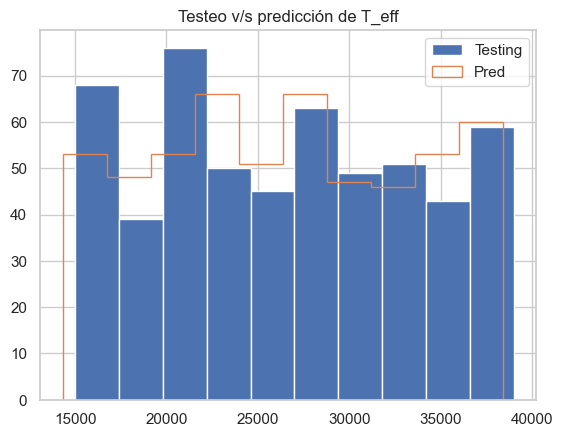

In [99]:


plt.figure()
plt.hist(y_test[:,0], label="Testing")
plt.hist(y_test_pred_inv[:,0], label="Pred", histtype='step')
plt.title("Testeo v/s predicción de T_eff")
plt.legend(loc="best")
plt.show()

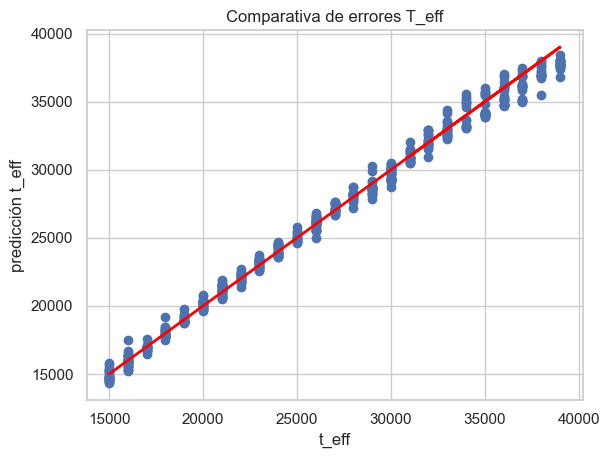

In [100]:
plt.figure()
plt.plot( y_test[:,0],y_test_pred_inv[:,0],'o')
plt.title("Comparativa de errores T_eff")
plt.plot(y_test[:,0], y_test[:,0], color='red', linewidth='2.0', linestyle='-')
plt.ylabel("predicción t_eff")
plt.xlabel("t_eff")
plt.show()

### Gravedad superficial (log g)

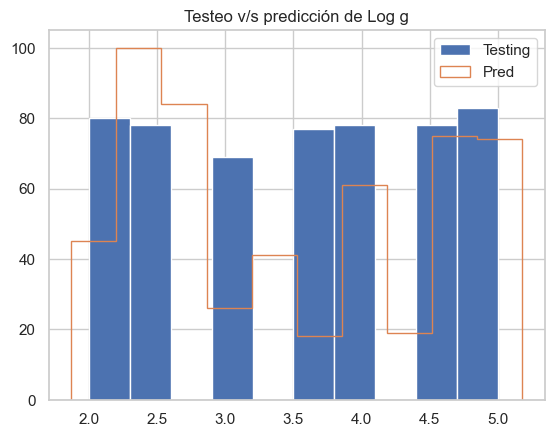

In [101]:
plt.figure()
plt.hist(y_test[:,1], label="Testing")
plt.hist(y_test_pred_inv[:,1], label="Pred", histtype='step')
plt.title("Testeo v/s predicción de Log g")
plt.legend(loc="best")
plt.show()

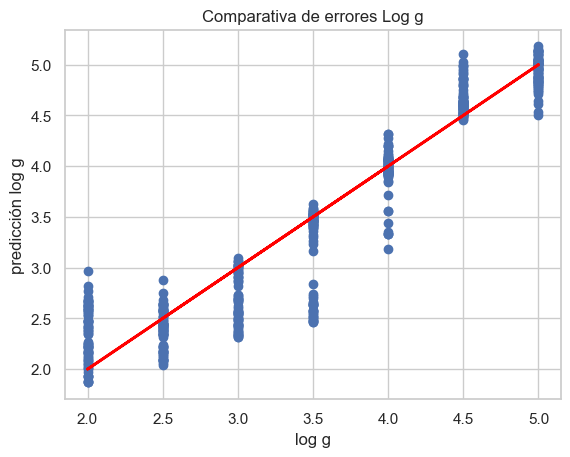

In [102]:
plt.figure()
plt.plot( y_test[:,1],y_test_pred_inv[:,1],'o')
plt.title("Comparativa de errores Log g")
plt.plot(y_test[:,1], y_test[:,1], color='red', linewidth='2.0', linestyle='-')
plt.ylabel("predicción log g")
plt.xlabel("log g")
plt.show()

Text(0, 0.5, 'predicción log g')

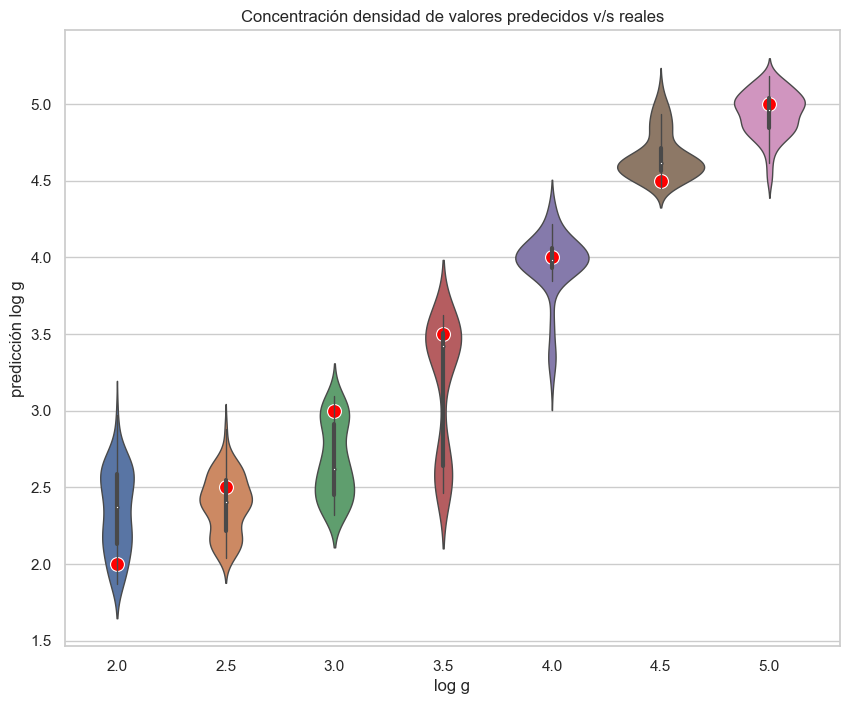

In [103]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.violinplot(x =y_test[:,1], y =y_test_pred_inv[:,1], linewidth = 1, ax=ax).set(title='Concentración densidad de valores predecidos v/s reales')
sns.scatterplot(data=np.unique(y_test[:,1]),color = 'red',s=100,marker= "o", ax=ax)

plt.xlabel('log g')
plt.ylabel('predicción log g')

### Velocidad de rotación (Vroot)

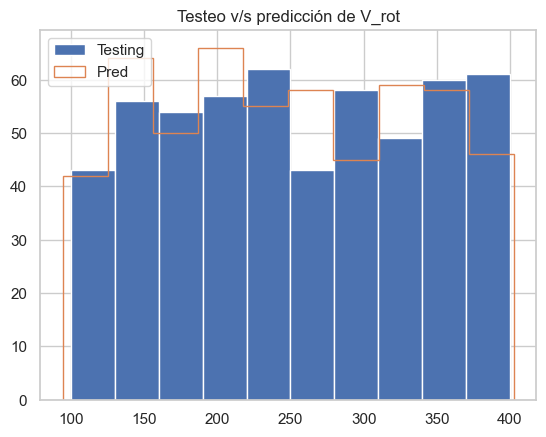

In [104]:
plt.figure()
plt.hist(y_test[:,2], label="Testing")
plt.hist(y_test_pred_inv[:,2], label="Pred", histtype='step')
plt.title("Testeo v/s predicción de V_rot")
plt.legend(loc="best")
plt.show()

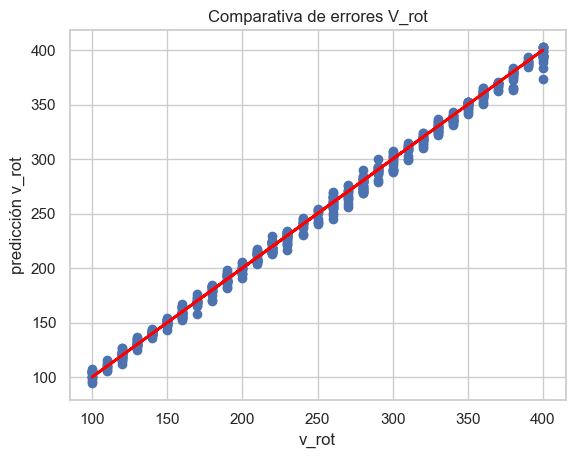

In [105]:
plt.figure()
plt.title("Comparativa de errores V_rot")
plt.plot( y_test[:,2],y_test_pred_inv[:,2],'o')
plt.plot(y_test[:,2], y_test[:,2], color='red', linewidth='2.0', linestyle='-')
plt.ylabel("predicción v_rot")
plt.xlabel("v_rot")
plt.show()

# FASE 4 - PREDICCIÓN

### Estrella HD33328

In [106]:
df = pd.read_csv("BESOS/2_Be_stars/HD33328/PUCHEROS/hd33328_2013-02-26_00-55-34_final_corr.txt", sep="\t", header=None)

m1 = df[0] >= 4460
m2 = df[0] <= 4480

df2 = df[m1][m2]

n = 201 
index = np.random.choice(df2[0].shape[0], n, replace=False) 

/var/folders/wv/6gcw11vd29dd2c9_187t7rf80000gn/T/ipykernel_913/1239881587.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[m1][m2]


In [107]:
n = 201 
index = np.random.choice(df2[0].shape[0], n, replace=False) 

In [108]:
index.sort()

In [109]:
obs_waves = df2[0].values[index]

obs_flux = df2[1].values[index]

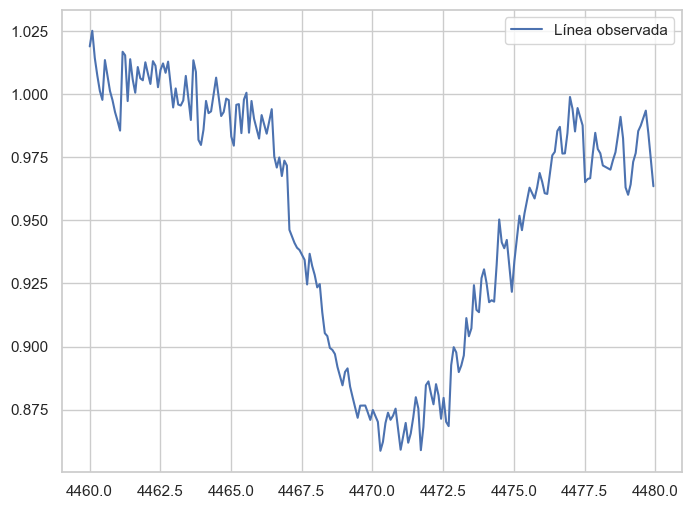

In [110]:
plt.figure(figsize=(8,6))
plt.plot(obs_waves, obs_flux ,label="Línea observada")
plt.legend(loc="best")
plt.show()

In [111]:
#obs_x_reshaped = x_obs_inv.reshape((1, time_steps, input_dimension))
#obs_x_reshaped = obs_x.reshape((1, time_steps, input_dimension))
time_steps = X.shape[1]
input_dimension = 1
obs_flux_reshaped = obs_flux.reshape((1, time_steps, input_dimension))


In [112]:
pred_obs =loaded_model.predict(obs_flux_reshaped)

1/1 [==============================] - 1s 1s/step


In [113]:
# Acá los resultados es con los datos normalizados
print("t_eff:", pred_obs[0][0])
print("log g:", pred_obs[0][1])
print("v_rot:", pred_obs[0][2])


t_eff: 0.39316845
log g: -1.0924994
v_rot: -0.17695163


## "Desnomralización de la predicción"

In [114]:
pred_obs_inv = scaler2.inverse_transform(pred_obs)

In [115]:
pred_obs_inv

array([[2.9835178e+04, 2.4075007e+00, 2.3417296e+02]], dtype=float32)

In [116]:
print("Parámetros estelares obtenidos mediante predicción - estrella HD33328\n")
print("Teff: ",pred_obs_inv[0,0])
print("Log(g): ",pred_obs_inv[0,1])
print("Vroot: ",pred_obs_inv[0,2])

Parámetros estelares obtenidos mediante predicción - estrella HD33328

Teff:  29835.178
Log(g):  2.4075007
Vroot:  234.17296


Valores reales de parámetros estelares - estrella HD33328

Teff: $19526 ± 195$

Log(g):  $3.3 ± 0.03$

Vroot:  $287 ± 6$

In [117]:
#Variables de parámetros reales BESOS estrella HD33328

Teff_HD33328=19526
logg_HD33328=3.00
vroot_HD33328=287

### Comparación de resultados

In [118]:

def dif_absoluta(v_real,v_predict):
    return abs(v_real-v_predict)

def dif_porcentual(v_real, v_predict):
    return abs(((v_predict/v_real) * 100) - 100)

In [119]:
print("Temperatura efectiva (Teff)\n")
print("\tDiferencia Absoluta: ",dif_absoluta(Teff_HD33328,pred_obs_inv[0,0]))
print("\tDiferencia porcentual: ",dif_porcentual(Teff_HD33328,pred_obs_inv[0,0]) , "%")

print("\nGravedad superficial (Log g)\n")
print("\tDiferencia Absoluta: ",dif_absoluta(logg_HD33328,pred_obs_inv[0,1]))
print("\tDiferencia porcentual: ",dif_porcentual(logg_HD33328,pred_obs_inv[0,1]), "%")

print("\nVelocidad de rotación (Vroot)\n")
print("\tDiferencia Absoluta: ",dif_absoluta(vroot_HD33328,pred_obs_inv[0,2]))
print("\tDiferencia porcentual: ",dif_porcentual(vroot_HD33328,pred_obs_inv[0,2]), "%")

Temperatura efectiva (Teff)

	Diferencia Absoluta:  10309.177734375
	Diferencia porcentual:  52.79718188249001 %

Gravedad superficial (Log g)

	Diferencia Absoluta:  0.5924992561340332
	Diferencia porcentual:  19.749975204467773 %

Velocidad de rotación (Vroot)

	Diferencia Absoluta:  52.82704162597656
	Diferencia porcentual:  18.406634712883815 %
